In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_time, output_img)
sd2 = tf.keras.Model(input_time, output_img)
sd3 = tf.keras.Model(input_time, output_img)

In [18]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 128)              256       
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 128)              16512     
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 128)              16512     
 se)                                                             
                                                             

In [19]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sd1.fit(t_train, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 6ms/step - loss: 0.4769 - rmse: 0.4704
Epoch 2/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4757 - rmse: 0.4701
Epoch 3/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4744 - rmse: 0.4699
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4731 - rmse: 0.4696
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4719 - rmse: 0.4693
Epoch 6/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4706 - rmse: 0.4690
Epoch 7/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4693 - rmse: 0.4687
Epoch 8/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4681 - rmse: 0.4683
Epoch 9/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4668 - rmse: 0.4680
Epoch 10/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4655 - rmse: 0.4677
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2745 - rmse: 0.2884
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2721 - rmse: 0.2851
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2699 - rmse: 0.2821
Epoch 89/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2679 - rmse: 0.2797
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2663 - rmse: 0.2778
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2648 - rmse: 0.2762
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2633 - rmse: 0.2746
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2621 - rmse: 0.2735
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2609 - rmse: 0.2726
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2597 - rmse: 0.2716
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.2017 - rmse: 0.2392
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2009 - rmse: 0.2387
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2003 - rmse: 0.2383
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1996 - rmse: 0.2378
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1988 - rmse: 0.2371
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1980 - rmse: 0.2364
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1973 - rmse: 0.2357
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1964 - rmse: 0.2348
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1954 - rmse: 0.2336
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1944 - rmse: 0.2324
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1517 - rmse: 0.2011
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1512 - rmse: 0.2006
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1507 - rmse: 0.2001
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1502 - rmse: 0.1997
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1497 - rmse: 0.1993
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1492 - rmse: 0.1989
Epoch 260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1487 - rmse: 0.1985
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1483 - rmse: 0.1983
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1479 - rmse: 0.1980
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1475 - rmse: 0.1978
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1135 - rmse: 0.1601
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1131 - rmse: 0.1597
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1128 - rmse: 0.1593
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1124 - rmse: 0.1588
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1119 - rmse: 0.1581
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1115 - rmse: 0.1573
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1110 - rmse: 0.1566
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1106 - rmse: 0.1560
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1102 - rmse: 0.1554
Epoch 347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1097 - rmse: 0.1546
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0819 - rmse: 0.1017
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0816 - rmse: 0.1009
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0812 - rmse: 0.1002
Epoch 425/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0810 - rmse: 0.0997
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0807 - rmse: 0.0991
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0805 - rmse: 0.0987
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0802 - rmse: 0.0980
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0798 - rmse: 0.0971
Epoch 430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0795 - rmse: 0.0960
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0791 - rmse: 0.0950
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0618 - rmse: 0.0515
Epoch 507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0616 - rmse: 0.0512
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0614 - rmse: 0.0510
Epoch 509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0613 - rmse: 0.0507
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0611 - rmse: 0.0505
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0610 - rmse: 0.0504
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0608 - rmse: 0.0502
Epoch 513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0607 - rmse: 0.0500
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0605 - rmse: 0.0497
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0603 - rmse: 0.0495
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0496 - rmse: 0.0299
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0495 - rmse: 0.0299
Epoch 592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0494 - rmse: 0.0298
Epoch 593/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0493 - rmse: 0.0298
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0491 - rmse: 0.0298
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0490 - rmse: 0.0297
Epoch 596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0489 - rmse: 0.0297
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0488 - rmse: 0.0296
Epoch 598/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0487 - rmse: 0.0294
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0485 - rmse: 0.0292
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0408 - rmse: 0.0264
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0407 - rmse: 0.0264
Epoch 676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0406 - rmse: 0.0264
Epoch 677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0405 - rmse: 0.0265
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0404 - rmse: 0.0266
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0403 - rmse: 0.0265
Epoch 680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0402 - rmse: 0.0263
Epoch 681/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0401 - rmse: 0.0262
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0400 - rmse: 0.0261
Epoch 683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0399 - rmse: 0.0261
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0339 - rmse: 0.0246
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0338 - rmse: 0.0241
Epoch 760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0337 - rmse: 0.0239
Epoch 761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0336 - rmse: 0.0238
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0335 - rmse: 0.0238
Epoch 763/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0335 - rmse: 0.0239
Epoch 764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0334 - rmse: 0.0241
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0334 - rmse: 0.0243
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0333 - rmse: 0.0246
Epoch 767/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0332 - rmse: 0.0248
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0284 - rmse: 0.0232
Epoch 843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0284 - rmse: 0.0234
Epoch 844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0283 - rmse: 0.0234
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.0231
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.0228
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0281 - rmse: 0.0227
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0280 - rmse: 0.0227
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0280 - rmse: 0.0227
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0279 - rmse: 0.0227
Epoch 851/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0279 - rmse: 0.0227
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0240 - rmse: 0.0212
Epoch 927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0240 - rmse: 0.0212
Epoch 928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0239 - rmse: 0.0213
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0239 - rmse: 0.0215
Epoch 930/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0238 - rmse: 0.0215
Epoch 931/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0238 - rmse: 0.0213
Epoch 932/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0237 - rmse: 0.0211
Epoch 933/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0237 - rmse: 0.0210
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.0209
Epoch 935/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0236 - rmse: 0.0209
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0205 - rmse: 0.0182
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.0182
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.0183
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.0184
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.0186
Epoch 1015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0203 - rmse: 0.0186
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.0186
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.0187
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.0188
Epoch 1019/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0201 - rmse: 0.0189
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.0213
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.0213
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.0212
Epoch 1096/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0175 - rmse: 0.0208
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.0207
Epoch 1098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.0207
Epoch 1099/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.0208
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.0208
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.0206
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.0204
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0152 - rmse: 0.0177
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.0176
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.0175
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.0174
Epoch 1180/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0151 - rmse: 0.0172
Epoch 1181/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0150 - rmse: 0.0172
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.0172
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.0173
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.0175
Epoch 1185/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0149 - rmse: 0.0176
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0131 - rmse: 0.0205
Epoch 1260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0131 - rmse: 0.0206
Epoch 1261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0131 - rmse: 0.0207
Epoch 1262/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0131 - rmse: 0.0208
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0208
Epoch 1264/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.0209
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0209
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0209
Epoch 1267/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0129 - rmse: 0.0210
Epoch 1268/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.0211
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0114 - rmse: 0.0196
Epoch 1343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0114 - rmse: 0.0199
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.0201
Epoch 1345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.0198
Epoch 1346/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0113 - rmse: 0.0194
Epoch 1347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0113 - rmse: 0.0193
Epoch 1348/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0192
Epoch 1349/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0192
Epoch 1350/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0192
Epoch 1351/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0192
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0180
Epoch 1426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0180
Epoch 1427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0182
Epoch 1428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0184
Epoch 1429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0187
Epoch 1430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0191
Epoch 1431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0193
Epoch 1432/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0193
Epoch 1433/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0191
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0189
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0086 - rmse: 0.0176
Epoch 1509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0176
Epoch 1510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0086 - rmse: 0.0177
Epoch 1511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0177
Epoch 1512/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0176
Epoch 1513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0085 - rmse: 0.0177
Epoch 1514/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0085 - rmse: 0.0177
Epoch 1515/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0085 - rmse: 0.0178
Epoch 1516/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0085 - rmse: 0.0179
Epoch 1517/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0085 - rmse: 0.0180
Epoch 1518/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0173
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0173
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0171
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0169
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0168
Epoch 1596/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0075 - rmse: 0.0168
Epoch 1597/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0168
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0169
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0170
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0169
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0173
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0157
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0146
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0143
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0147
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0152
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0154
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0155
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0155
Epoch 1683/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0065 - rmse: 0.0153
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0171
Epoch 1758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0170
Epoch 1759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0170
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0170
Epoch 1761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0171
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0172
Epoch 1763/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0176
Epoch 1764/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0180
Epoch 1765/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0184
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0181
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0176
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0183
Epoch 1842/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0184
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0175
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0161
Epoch 1845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0153
Epoch 1846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0150
Epoch 1847/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0148
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0147
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0147
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0168
Epoch 1924/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0169
Epoch 1925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0170
Epoch 1926/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0172
Epoch 1927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0175
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0178
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0180
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0182
Epoch 1931/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0184
Epoch 1932/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0186
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0162
Epoch 2007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0163
Epoch 2008/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0165
Epoch 2009/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0166
Epoch 2010/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0165
Epoch 2011/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0164
Epoch 2012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0168
Epoch 2013/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0175
Epoch 2014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0175
Epoch 2015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0166
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0144
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0147
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0150
Epoch 2092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0154
Epoch 2093/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0157
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0160
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0162
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0164
Epoch 2097/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0165
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0166
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0131
Epoch 2173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0133
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0135
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0137
Epoch 2176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0137
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0138
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0140
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0142
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0146
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0152
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0145
Epoch 2256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0147
Epoch 2257/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0150
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0153
Epoch 2259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0152
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0151
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0154
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0156
Epoch 2263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0157
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0158
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0154
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0155
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0157
Epoch 2341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0160
Epoch 2342/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0159
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0158
Epoch 2344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0158
Epoch 2345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0158
Epoch 2346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0157
Epoch 2347/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0156
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0130
Epoch 2422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0133
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0132
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0130
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0131
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0132
Epoch 2427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0132
Epoch 2428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0133
Epoch 2429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0134
Epoch 2430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0137
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0155
Epoch 2505/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0156
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0158
Epoch 2507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0159
Epoch 2508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0158
Epoch 2509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0158
Epoch 2510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0159
Epoch 2511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0160
Epoch 2512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0161
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0162
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0133
Epoch 2588/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0136
Epoch 2589/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0140
Epoch 2590/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0142
Epoch 2591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0144
Epoch 2592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0146
Epoch 2593/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0148
Epoch 2594/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0151
Epoch 2595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0153
Epoch 2596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0156
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0142
Epoch 2671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0143
Epoch 2672/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0146
Epoch 2673/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0148
Epoch 2674/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0150
Epoch 2675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0153
Epoch 2676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0155
Epoch 2677/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0157
Epoch 2678/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0159
Epoch 2679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0161
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0129
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0130
Epoch 2755/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0132
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0133
Epoch 2757/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0134
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0136
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0138
Epoch 2760/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0140
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0142
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0145
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0130
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0143
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0154
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0157
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0152
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0147
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0144
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0142
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0141
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0140
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0145
Epoch 2920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0146
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0151
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0154
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0147
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0134
Epoch 2925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0125
Epoch 2926/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0122
Epoch 2927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0120
Epoch 2928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0119
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0133
Epoch 3003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0133
Epoch 3004/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0134
Epoch 3005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0133
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0137
Epoch 3007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0144
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0148
Epoch 3009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0148
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0141
Epoch 3011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0133
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0155
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0157
Epoch 3087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0159
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0160
Epoch 3089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0160
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0159
Epoch 3091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0156
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0152
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0149
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0143
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0125
Epoch 3169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0125
Epoch 3170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0125
Epoch 3171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0126
Epoch 3172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0126
Epoch 3173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0127
Epoch 3174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0125
Epoch 3175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0124
Epoch 3176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0128
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0131
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0128
Epoch 3252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0135
Epoch 3253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0134
Epoch 3254/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0126
Epoch 3255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0121
Epoch 3256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0125
Epoch 3257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0134
Epoch 3258/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0143
Epoch 3259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0146
Epoch 3260/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0145
Epoch 3261/10000
2/2 [==============

2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0125
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0127
Epoch 3336/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0129
Epoch 3337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0127
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0126
Epoch 3339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0133
Epoch 3340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0146
Epoch 3341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0156
Epoch 3342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0157
Epoch 3343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0155
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0129
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0134
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0135
Epoch 3420/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0131
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0126
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0126
Epoch 3423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0131
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0150
Epoch 3425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0170
Epoch 3426/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0174
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0143
Epoch 3501/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0141
Epoch 3502/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0142
Epoch 3503/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0143
Epoch 3504/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0141
Epoch 3505/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0134
Epoch 3506/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0129
Epoch 3507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0127
Epoch 3508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0129
Epoch 3509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0132
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0144
Epoch 3584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0145
Epoch 3585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0146
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0136
Epoch 3587/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0122
Epoch 3588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0117
Epoch 3589/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0119
Epoch 3590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0119
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0117
Epoch 3592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0119
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0127
Epoch 3667/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0130
Epoch 3668/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0134
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0143
Epoch 3670/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0149
Epoch 3671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0141
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0123
Epoch 3673/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0118
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0136
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0151
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0120
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0120
Epoch 3751/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0112
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0108
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0109
Epoch 3754/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0114
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0122
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0134
Epoch 3757/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0146
Epoch 3758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0144
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0146
Epoch 3833/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0151
Epoch 3834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0148
Epoch 3835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0141
Epoch 3836/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0139
Epoch 3837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0138
Epoch 3838/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0137
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0137
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0142
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0149
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0130
Epoch 3916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0139
Epoch 3917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0143
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0141
Epoch 3919/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0137
Epoch 3920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0132
Epoch 3921/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0132
Epoch 3922/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0138
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0145
Epoch 3924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0148
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0130
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0128
Epoch 4000/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0127
Epoch 4001/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0125
Epoch 4002/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0121
Epoch 4003/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0119
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0118
Epoch 4005/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0119
Epoch 4006/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0121
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0121
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0125
Epoch 4082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0126
Epoch 4083/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0128
Epoch 4084/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0133
Epoch 4085/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0138
Epoch 4086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0140
Epoch 4087/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0141
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0142
Epoch 4089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0144
Epoch 4090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0149
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0156
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0152
Epoch 4166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0152
Epoch 4167/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0152
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0151
Epoch 4169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0151
Epoch 4170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0149
Epoch 4171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0147
Epoch 4172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0145
Epoch 4173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0144
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0129
Epoch 4248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0124
Epoch 4249/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0122
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0120
Epoch 4251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0118
Epoch 4252/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0119
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0120
Epoch 4254/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0120
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0121
Epoch 4256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0125
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0139
Epoch 4331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0143
Epoch 4332/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0137
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0128
Epoch 4334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0121
Epoch 4335/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0122
Epoch 4336/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0129
Epoch 4337/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0136
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0138
Epoch 4339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0132
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0102
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0100
Epoch 4415/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0101
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0103
Epoch 4417/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0106
Epoch 4418/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0104
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0103
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0105
Epoch 4421/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0108
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0111
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0132
Epoch 4497/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0128
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0124
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0124
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0127
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0128
Epoch 4502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0123
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0118
Epoch 4504/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0116
Epoch 4505/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0117
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0153
Epoch 4580/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0154
Epoch 4581/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0155
Epoch 4582/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0156
Epoch 4583/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0158
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0151
Epoch 4585/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0149
Epoch 4586/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0153
Epoch 4587/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0148
Epoch 4588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0137
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0115
Epoch 4663/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0114
Epoch 4664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0108
Epoch 4665/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0101
Epoch 4666/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0103
Epoch 4667/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0104
Epoch 4668/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0100
Epoch 4669/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0100
Epoch 4670/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0108
Epoch 4671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0121
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0137
Epoch 4746/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0139
Epoch 4747/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0142
Epoch 4748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0143
Epoch 4749/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0143
Epoch 4750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0142
Epoch 4751/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0137
Epoch 4752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0136
Epoch 4753/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0136
Epoch 4754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0130
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0127
Epoch 4829/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0130
Epoch 4830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0131
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0129
Epoch 4832/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0129
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0129
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0126
Epoch 4835/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0128
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0131
Epoch 4837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0129
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0110
Epoch 4912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0112
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0116
Epoch 4914/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0119
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0122
Epoch 4916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0123
Epoch 4917/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0125
Epoch 4918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0126
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0127
Epoch 4920/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0129
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0130
Epoch 4995/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0132
Epoch 4996/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0131
Epoch 4997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0129
Epoch 4998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0128
Epoch 4999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0128
Epoch 5000/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0128
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0128
Epoch 5002/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0128
Epoch 5003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0128
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0131
Epoch 5078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0134
Epoch 5079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0136
Epoch 5080/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0137
Epoch 5081/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0137
Epoch 5082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0137
Epoch 5083/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0137
Epoch 5084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0137
Epoch 5085/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0137
Epoch 5086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0135
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0121
Epoch 5161/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0115
Epoch 5162/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0111
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0112
Epoch 5164/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0114
Epoch 5165/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0117
Epoch 5166/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0120
Epoch 5167/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0124
Epoch 5168/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0127
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0131
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0099
Epoch 5244/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0097
Epoch 5245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0099
Epoch 5246/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0106
Epoch 5247/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0108
Epoch 5248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0112
Epoch 5249/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0122
Epoch 5250/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0121
Epoch 5251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0111
Epoch 5252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0104
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0121
Epoch 5327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0123
Epoch 5328/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0128
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0130
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0128
Epoch 5331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0126
Epoch 5332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0128
Epoch 5333/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0131
Epoch 5334/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0132
Epoch 5335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0132
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0146
Epoch 5410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0146
Epoch 5411/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0145
Epoch 5412/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0145
Epoch 5413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0144
Epoch 5414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0141
Epoch 5415/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0139
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0138
Epoch 5417/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0137
Epoch 5418/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0136
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0107
Epoch 5493/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0102
Epoch 5494/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0102
Epoch 5495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0105
Epoch 5496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0106
Epoch 5497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0109
Epoch 5498/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0107
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0112
Epoch 5500/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0117
Epoch 5501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0115
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0099
Epoch 5576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0097
Epoch 5577/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0097
Epoch 5578/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0097
Epoch 5579/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0099
Epoch 5580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0100
Epoch 5581/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0103
Epoch 5582/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0105
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0103
Epoch 5584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0099
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0129
Epoch 5659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0136
Epoch 5660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0138
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0130
Epoch 5662/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0111
Epoch 5663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0110
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0126
Epoch 5665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0132
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0126
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0118
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0131
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0132
Epoch 5743/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0135
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0142
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0145
Epoch 5746/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0142
Epoch 5747/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0138
Epoch 5748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0140
Epoch 5749/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0153
Epoch 5750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0163
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0123
Epoch 5825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0127
Epoch 5826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0117
Epoch 5827/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0110
Epoch 5828/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0118
Epoch 5829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0130
Epoch 5830/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0132
Epoch 5831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0128
Epoch 5832/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0125
Epoch 5833/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0122
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0108
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0110
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0117
Epoch 5910/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0131
Epoch 5911/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0140
Epoch 5912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0127
Epoch 5913/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0109
Epoch 5914/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0109
Epoch 5915/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0118
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0119
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0127
Epoch 5991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0127
Epoch 5992/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0128
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0121
Epoch 5994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0120
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0135
Epoch 5996/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0141
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0135
Epoch 5998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0122
Epoch 5999/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0112
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0126
Epoch 6074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0097
Epoch 6075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0112
Epoch 6076/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0129
Epoch 6077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0132
Epoch 6078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0120
Epoch 6079/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0105
Epoch 6080/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0099
Epoch 6081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0099
Epoch 6082/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0102
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0130
Epoch 6157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0134
Epoch 6158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0134
Epoch 6159/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0123
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0112
Epoch 6161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0108
Epoch 6162/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0109
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0116
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0119
Epoch 6165/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0115
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0105
Epoch 6240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0108
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0104
Epoch 6242/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0101
Epoch 6243/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0098
Epoch 6244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0098
Epoch 6245/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0107
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0120
Epoch 6247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0124
Epoch 6248/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0118
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0123
Epoch 6323/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0117
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0122
Epoch 6325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0127
Epoch 6326/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0136
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0146
Epoch 6328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0138
Epoch 6329/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0121
Epoch 6330/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0110
Epoch 6331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0117
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0111
Epoch 6406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0114
Epoch 6407/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0113
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0112
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0113
Epoch 6410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0115
Epoch 6411/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0117
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0120
Epoch 6413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0122
Epoch 6414/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0122
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0123
Epoch 6489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0127
Epoch 6490/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0126
Epoch 6491/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0129
Epoch 6492/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0136
Epoch 6493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0136
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0127
Epoch 6495/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0120
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0125
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0133
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0105
Epoch 6572/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0105
Epoch 6573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0106
Epoch 6574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0104
Epoch 6575/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0105
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0110
Epoch 6577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0110
Epoch 6578/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0107
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0106
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0106
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0127
Epoch 6655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0130
Epoch 6656/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0124
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0118
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0117
Epoch 6659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0121
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0117
Epoch 6661/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0112
Epoch 6662/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0119
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0120
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0103
Epoch 6738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0103
Epoch 6739/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0109
Epoch 6740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0112
Epoch 6741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0106
Epoch 6742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0104
Epoch 6743/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0107
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0112
Epoch 6745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0116
Epoch 6746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0116
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0138
Epoch 6821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0165
Epoch 6822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0155
Epoch 6823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0121
Epoch 6824/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0099
Epoch 6825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0110
Epoch 6826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0127
Epoch 6827/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0127
Epoch 6828/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0122
Epoch 6829/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0117
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0143
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0145
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0116
Epoch 6906/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0095
Epoch 6907/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0104
Epoch 6908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0121
Epoch 6909/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0123
Epoch 6910/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0108
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0100
Epoch 6912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0101
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0121
Epoch 6987/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0129
Epoch 6988/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0119
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0099
Epoch 6990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0094
Epoch 6991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0110
Epoch 6992/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0114
Epoch 6993/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0100
Epoch 6994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0092
Epoch 6995/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0095
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0127
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0124
Epoch 7071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0122
Epoch 7072/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0124
Epoch 7073/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0126
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0125
Epoch 7075/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0124
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0123
Epoch 7077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0124
Epoch 7078/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0125
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0107
Epoch 7153/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0111
Epoch 7154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0112
Epoch 7155/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0113
Epoch 7156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0114
Epoch 7157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0115
Epoch 7158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0117
Epoch 7159/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0118
Epoch 7160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0119
Epoch 7161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0117
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0107
Epoch 7236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0115
Epoch 7237/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0129
Epoch 7238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0138
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0129
Epoch 7240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0111
Epoch 7241/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0101
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0116
Epoch 7243/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0141
Epoch 7244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0153
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0102
Epoch 7319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0104
Epoch 7320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0106
Epoch 7321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0108
Epoch 7322/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0110
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0115
Epoch 7324/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0113
Epoch 7325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0105
Epoch 7326/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0103
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0107
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0096
Epoch 7402/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0101
Epoch 7403/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0106
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0104
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0099
Epoch 7406/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0104
Epoch 7407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0115
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0121
Epoch 7409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0111
Epoch 7410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0110
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0107
Epoch 7485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0108
Epoch 7486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0105
Epoch 7487/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0102
Epoch 7488/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0106
Epoch 7489/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0112
Epoch 7490/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0111
Epoch 7491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0110
Epoch 7492/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0112
Epoch 7493/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0115
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0099
Epoch 7568/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0100
Epoch 7569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0107
Epoch 7570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0107
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0099
Epoch 7572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0101
Epoch 7573/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0105
Epoch 7574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0103
Epoch 7575/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0099
Epoch 7576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0097
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0094
Epoch 7651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0091
Epoch 7652/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0089
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0094
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0102
Epoch 7655/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0100
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0095
Epoch 7657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0096
Epoch 7658/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0100
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0105
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0123
Epoch 7734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0112
Epoch 7735/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0118
Epoch 7736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0130
Epoch 7737/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0127
Epoch 7738/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0118
Epoch 7739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0114
Epoch 7740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0115
Epoch 7741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0123
Epoch 7742/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0130
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0113
Epoch 7817/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0115
Epoch 7818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0118
Epoch 7819/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0116
Epoch 7820/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0110
Epoch 7821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0105
Epoch 7822/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0108
Epoch 7823/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0111
Epoch 7824/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0107
Epoch 7825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0107
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0140
Epoch 7900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0133
Epoch 7901/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0125
Epoch 7902/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0122
Epoch 7903/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0123
Epoch 7904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0124
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0124
Epoch 7906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0123
Epoch 7907/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0123
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0125
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 7983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 7984/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0099
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0096
Epoch 7986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0097
Epoch 7987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0106
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0114
Epoch 7989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0108
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0097
Epoch 7991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0092
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0097
Epoch 8066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0100
Epoch 8067/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0102
Epoch 8068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0100
Epoch 8069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0099
Epoch 8070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0101
Epoch 8071/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0105
Epoch 8072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0107
Epoch 8073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0110
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0112
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0125
Epoch 8149/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0126
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0129
Epoch 8151/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0130
Epoch 8152/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0126
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0124
Epoch 8154/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0124
Epoch 8155/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0124
Epoch 8156/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0124
Epoch 8157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0125
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0116
Epoch 8232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0120
Epoch 8233/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0113
Epoch 8234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0107
Epoch 8235/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0109
Epoch 8236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0114
Epoch 8237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0114
Epoch 8238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0112
Epoch 8239/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0111
Epoch 8240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0111
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0128
Epoch 8315/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0115
Epoch 8316/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0093
Epoch 8317/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0099
Epoch 8318/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0128
Epoch 8319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0144
Epoch 8320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0137
Epoch 8321/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0114
Epoch 8322/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0099
Epoch 8323/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0104
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0126
Epoch 8398/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0125
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0121
Epoch 8400/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0121
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0122
Epoch 8402/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0122
Epoch 8403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0129
Epoch 8404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0146
Epoch 8405/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0152
Epoch 8406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0134
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0102
Epoch 8481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 8482/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0108
Epoch 8483/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0106
Epoch 8484/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0100
Epoch 8485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0101
Epoch 8486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 8487/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0102
Epoch 8488/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0018 - rmse: 0.0101
Epoch 8489/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0105
Epoch 8490/10000
2/2 [==============

2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0119
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0106
Epoch 8565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0113
Epoch 8566/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0121
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0127
Epoch 8568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0118
Epoch 8569/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 8570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0102
Epoch 8571/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0109
Epoch 8572/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0113
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0120
Epoch 8647/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0118
Epoch 8648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0119
Epoch 8649/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0123
Epoch 8650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0125
Epoch 8651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0126
Epoch 8652/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0119
Epoch 8653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0125
Epoch 8654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0142
Epoch 8655/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0140
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0133
Epoch 8730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0136
Epoch 8731/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0124
Epoch 8732/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0114
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0115
Epoch 8734/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0116
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0115
Epoch 8736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0114
Epoch 8737/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0113
Epoch 8738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0113
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0114
Epoch 8813/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 8814/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0105
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0111
Epoch 8816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0109
Epoch 8817/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0106
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0105
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0113
Epoch 8820/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0122
Epoch 8821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0117
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0098
Epoch 8896/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0122
Epoch 8897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0151
Epoch 8898/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0167
Epoch 8899/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0175
Epoch 8900/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0148
Epoch 8901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 8902/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0116
Epoch 8903/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0156
Epoch 8904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0175
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0092
Epoch 8979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0094
Epoch 8980/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 8981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0105
Epoch 8982/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 8983/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0102
Epoch 8984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0104
Epoch 8985/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0108
Epoch 8986/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0110
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0109
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0101
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0103
Epoch 9063/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0105
Epoch 9064/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0107
Epoch 9065/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0109
Epoch 9066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0111
Epoch 9067/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0113
Epoch 9068/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0114
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0115
Epoch 9070/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0114
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0113
Epoch 9145/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0120
Epoch 9146/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0123
Epoch 9147/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0117
Epoch 9148/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0109
Epoch 9149/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0102
Epoch 9150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0105
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0119
Epoch 9152/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0119
Epoch 9153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0109
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0096
Epoch 9228/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0108
Epoch 9229/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0124
Epoch 9230/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0120
Epoch 9231/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0106
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0104
Epoch 9233/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0122
Epoch 9234/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0136
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0125
Epoch 9236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0110
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0118
Epoch 9311/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0119
Epoch 9312/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0121
Epoch 9313/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0121
Epoch 9314/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0120
Epoch 9315/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0121
Epoch 9316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0124
Epoch 9317/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0125
Epoch 9318/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0123
Epoch 9319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0123
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0118
Epoch 9394/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0129
Epoch 9395/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0133
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0134
Epoch 9397/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0119
Epoch 9398/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0101
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0091
Epoch 9400/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0097
Epoch 9401/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0097
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0089
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0122
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0121
Epoch 9478/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0117
Epoch 9479/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0117
Epoch 9480/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0119
Epoch 9481/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0123
Epoch 9482/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0143
Epoch 9483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0157
Epoch 9484/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0135
Epoch 9485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0108
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0091
Epoch 9560/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0093
Epoch 9561/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0095
Epoch 9562/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0097
Epoch 9563/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0099
Epoch 9564/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0101
Epoch 9565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0102
Epoch 9566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0104
Epoch 9567/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0105
Epoch 9568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0106
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0086
Epoch 9643/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0086
Epoch 9644/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0091
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0098
Epoch 9646/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0102
Epoch 9647/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0102
Epoch 9648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0101
Epoch 9649/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0101
Epoch 9650/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0106
Epoch 9651/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0109
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0103
Epoch 9726/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0108
Epoch 9727/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0103
Epoch 9728/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0100
Epoch 9729/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0101
Epoch 9730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0104
Epoch 9731/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0104
Epoch 9732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0103
Epoch 9733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0105
Epoch 9734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0106
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0116
Epoch 9809/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0131
Epoch 9810/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0147
Epoch 9811/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0142
Epoch 9812/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0108
Epoch 9813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0102
Epoch 9814/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0125
Epoch 9815/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0130
Epoch 9816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0116
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0101
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0110
Epoch 9892/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0095
Epoch 9893/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0103
Epoch 9894/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0119
Epoch 9895/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0135
Epoch 9896/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0129
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0099
Epoch 9898/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0089
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0107
Epoch 9900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0121
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0111
Epoch 9975/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0111
Epoch 9976/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0112
Epoch 9977/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0113
Epoch 9978/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0121
Epoch 9979/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0129
Epoch 9980/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0123
Epoch 9981/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0113
Epoch 9982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0113
Epoch 9983/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0117
Epoch 9984/10000
2/2 [===============

In [21]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:01:55.030387


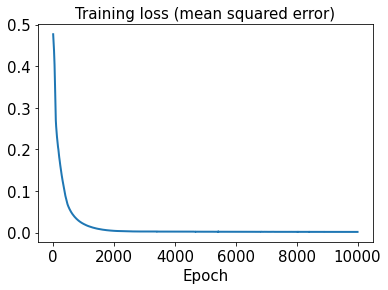

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

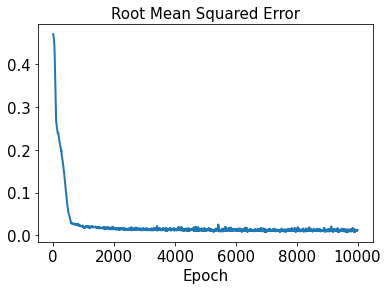

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
test_results1 = sd1.evaluate(t_test)

1/1 [==============================] - 0s 90ms/step - loss: 0.0016 - rmse: 0.0000e+00


In [25]:
decoded_train1 = sd1.predict(t_train)

In [26]:
decoded_test1 = sd1.predict(t_test)

In [27]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [28]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [29]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.026837255370096902


In [30]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.01759857593312028


In [31]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.0028737073077747016, 0.019430400019617527, 0.00555427894073243, 0.007168643376224411, 0.016455223428582317, 0.004410082239161849, 0.01436652619486573, 0.0013953131211558887, 0.015701658430413344, 0.0018076233847007155, 0.0016558045734466952, 0.058109932487240196, 0.004240916942626547, 0.025148844181599794, 0.003819939129015541, 0.050995825594372754, 0.002515705896122522, 0.013026665752914834, 0.044125324366328676, 0.001763306267483037, 0.0032695264533073765, 0.03751537039469201, 0.002513439734694373, 0.0069793923142905355, 0.001426102190214815, 0.0007687697121384077, 0.010392720600839548, 0.016596712621658103, 0.014915619213159722, 0.014049337868655323, 0.012479518689573988, 0.003267537972977209, 0.003579910640765254]


In [32]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.0027648832605140974, 0.010069986955173254, 0.009029799791918964, 0.002421664979514397, 0.03118369193960642, 0.0028295751833654083, 0.01609435290484814, 0.0033942977235732435]


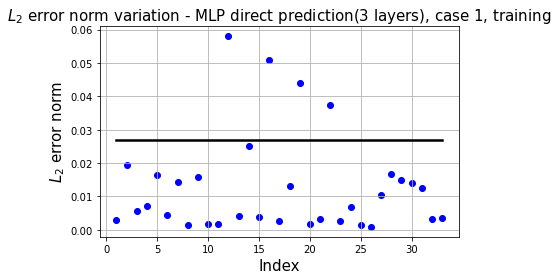

In [33]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

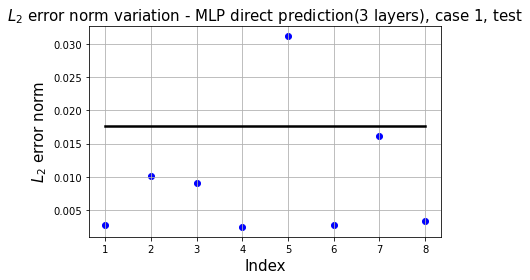

In [34]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

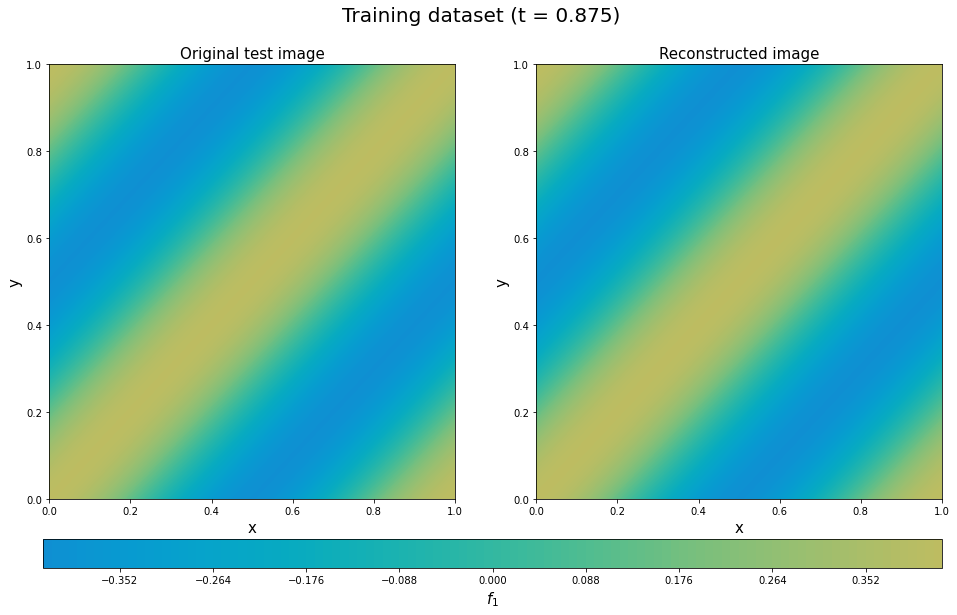

In [35]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

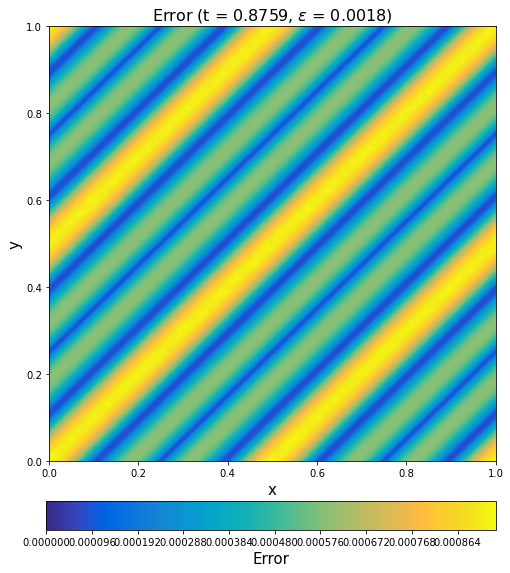

In [36]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

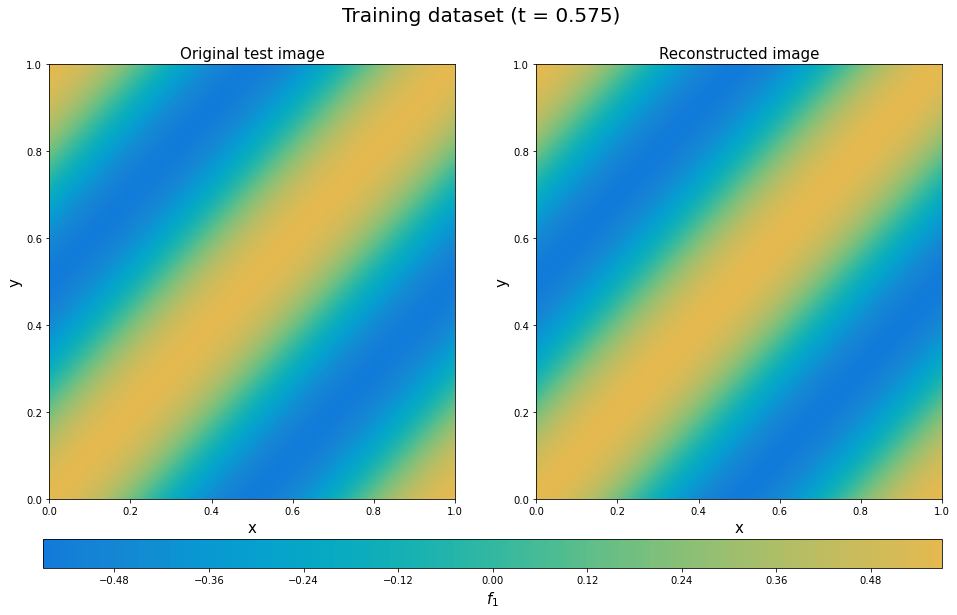

In [37]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

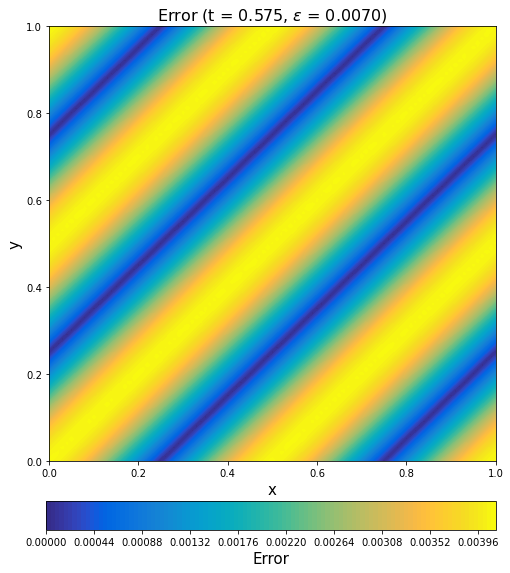

In [38]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

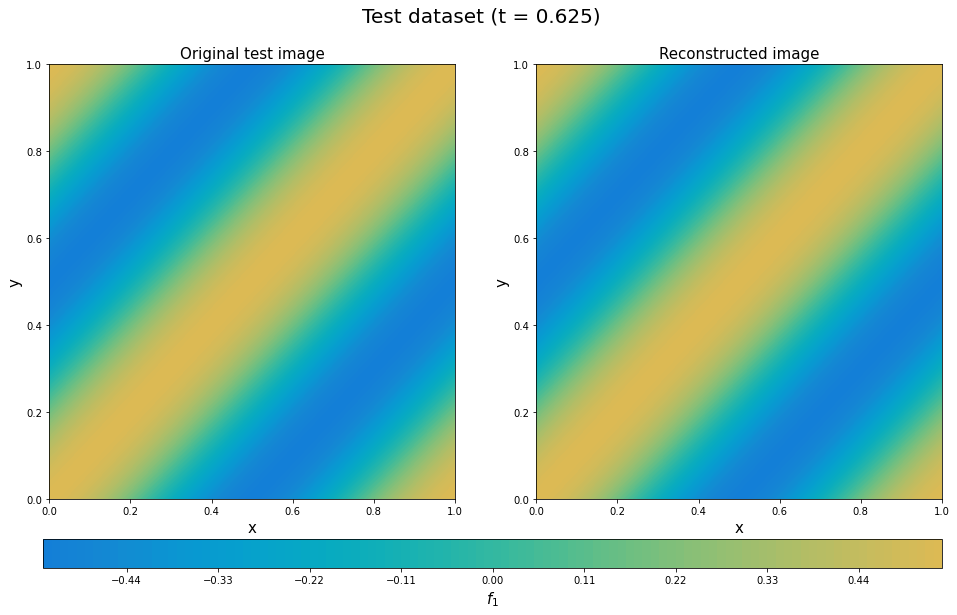

In [39]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

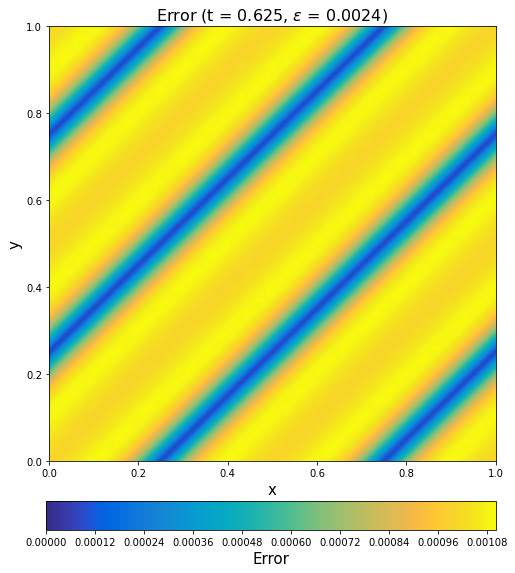

In [40]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

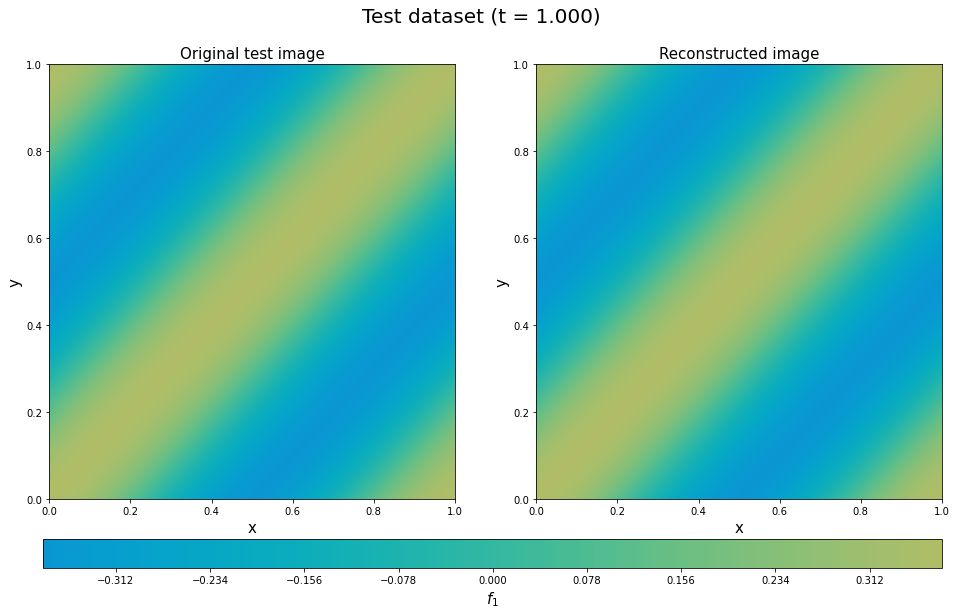

In [41]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

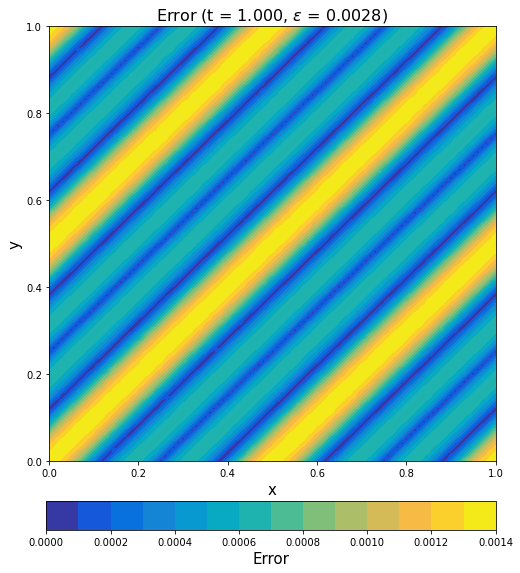

In [42]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [43]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [44]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [45]:
sensor2 = sensor2.reshape((41, 16, 1))

In [46]:
sensor2.shape

(41, 16, 1)

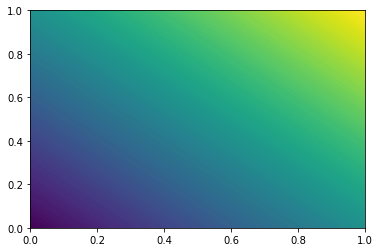

In [47]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [48]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [49]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [50]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [51]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [52]:
start2 = datetime.datetime.now()
history2 = sd2.fit(t_train, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6950 - rmse: 1.6412
Epoch 2/10000
2/2 [==============================] - 0s 64ms/step - loss: 2.6791 - rmse: 1.6363
Epoch 3/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6640 - rmse: 1.6317
Epoch 4/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6497 - rmse: 1.6273
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6360 - rmse: 1.6231
Epoch 6/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6228 - rmse: 1.6190
Epoch 7/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6098 - rmse: 1.6150
Epoch 8/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5972 - rmse: 1.6111
Epoch 9/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5852 - rmse: 1.6073
Epoch 10/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5735 - rmse: 1.6037
Epoch 11/10000
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 2.2224 - rmse: 1.4901
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2158 - rmse: 1.4879
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2090 - rmse: 1.4856
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2021 - rmse: 1.4833
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1951 - rmse: 1.4809
Epoch 91/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1877 - rmse: 1.4784
Epoch 92/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1800 - rmse: 1.4758
Epoch 93/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1720 - rmse: 1.4731
Epoch 94/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1637 - rmse: 1.4702
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1552 - rmse: 1.4674
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.3494 - rmse: 0.5857
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3303 - rmse: 0.5691
Epoch 172/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3120 - rmse: 0.5527
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2939 - rmse: 0.5360
Epoch 174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2759 - rmse: 0.5189
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2581 - rmse: 0.5013
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2408 - rmse: 0.4837
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2249 - rmse: 0.4669
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2102 - rmse: 0.4508
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1969 - rmse: 0.4357
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0259 - rmse: 0.1330
Epoch 255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0256 - rmse: 0.1317
Epoch 256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0253 - rmse: 0.1309
Epoch 257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0250 - rmse: 0.1295
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0245 - rmse: 0.1277
Epoch 259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0241 - rmse: 0.1261
Epoch 260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0238 - rmse: 0.1249
Epoch 261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0240 - rmse: 0.1254
Epoch 262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0246 - rmse: 0.1279
Epoch 263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0258 - rmse: 0.1326
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0218 - rmse: 0.1164
Epoch 339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1150
Epoch 340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0211 - rmse: 0.1136
Epoch 341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0209 - rmse: 0.1126
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0208 - rmse: 0.1123
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0208 - rmse: 0.1122
Epoch 344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0209 - rmse: 0.1126
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0211 - rmse: 0.1138
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1154
Epoch 347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0218 - rmse: 0.1168
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0196 - rmse: 0.1069
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1069
Epoch 424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1068
Epoch 425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0195 - rmse: 0.1067
Epoch 426/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0195 - rmse: 0.1065
Epoch 427/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0194 - rmse: 0.1062
Epoch 428/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0194 - rmse: 0.1061
Epoch 429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0194 - rmse: 0.1060
Epoch 430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0194 - rmse: 0.1060
Epoch 431/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0193 - rmse: 0.1059
Epoch 432/10000
2/2 [========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0186 - rmse: 0.1027
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1028
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1030
Epoch 509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0188 - rmse: 0.1036
Epoch 510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1047
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1050
Epoch 512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0189 - rmse: 0.1042
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1033
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1026
Epoch 515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1020
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.0979
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.0987
Epoch 592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0179 - rmse: 0.0996
Epoch 593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.0999
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.0993
Epoch 595/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0177 - rmse: 0.0982
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.0971
Epoch 597/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.0965
Epoch 598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0173 - rmse: 0.0963
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.0963
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.0925
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.0925
Epoch 676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.0926
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.0926
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.0925
Epoch 679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0165 - rmse: 0.0924
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.0925
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.0923
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.0920
Epoch 683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0165 - rmse: 0.0926
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0154 - rmse: 0.0868
Epoch 759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.0875
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.0888
Epoch 761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.0893
Epoch 762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0157 - rmse: 0.0886
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.0876
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0871
Epoch 765/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0154 - rmse: 0.0868
Epoch 766/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0154 - rmse: 0.0864
Epoch 767/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0153 - rmse: 0.0860
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 11ms/step - loss: 0.0143 - rmse: 0.0797
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0143 - rmse: 0.0798
Epoch 844/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0143 - rmse: 0.0798
Epoch 845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0143 - rmse: 0.0797
Epoch 846/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0143 - rmse: 0.0795
Epoch 847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0142 - rmse: 0.0794
Epoch 848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0142 - rmse: 0.0794
Epoch 849/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0142 - rmse: 0.0793
Epoch 850/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0142 - rmse: 0.0793
Epoch 851/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0142 - rmse: 0.0793
Epoch 852/10000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.0773
Epoch 927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0139 - rmse: 0.0773
Epoch 928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0139 - rmse: 0.0775
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.0776
Epoch 930/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0139 - rmse: 0.0775
Epoch 931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0139 - rmse: 0.0775
Epoch 932/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0139 - rmse: 0.0775
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.0775
Epoch 934/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0139 - rmse: 0.0774
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.0774
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0138 - rmse: 0.0771
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.0771
Epoch 1012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0138 - rmse: 0.0771
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.0770
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.0769
Epoch 1015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0137 - rmse: 0.0768
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.0767
Epoch 1017/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0137 - rmse: 0.0767
Epoch 1018/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0137 - rmse: 0.0766
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.0765
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0135 - rmse: 0.0763
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.0764
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.0764
Epoch 1096/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0136 - rmse: 0.0764
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.0764
Epoch 1098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0136 - rmse: 0.0764
Epoch 1099/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0136 - rmse: 0.0765
Epoch 1100/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0136 - rmse: 0.0766
Epoch 1101/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0136 - rmse: 0.0768
Epoch 1102/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0136 - rmse: 0.0769
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0764
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0763
Epoch 1178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0134 - rmse: 0.0764
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0763
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0763
Epoch 1181/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0134 - rmse: 0.0763
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0763
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0764
Epoch 1184/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0135 - rmse: 0.0766
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.0769
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.0758
Epoch 1260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.0758
Epoch 1261/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0132 - rmse: 0.0757
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.0758
Epoch 1263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.0758
Epoch 1264/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0132 - rmse: 0.0758
Epoch 1265/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.0757
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.0757
Epoch 1267/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.0758
Epoch 1268/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.0758
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0131 - rmse: 0.0757
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.0758
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.0758
Epoch 1345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0131 - rmse: 0.0757
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.0756
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.0756
Epoch 1348/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0130 - rmse: 0.0756
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0755
Epoch 1350/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.0755
Epoch 1351/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0130 - rmse: 0.0755
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0130 - rmse: 0.0757
Epoch 1426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.0758
Epoch 1427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.0758
Epoch 1428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0130 - rmse: 0.0757
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0757
Epoch 1430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.0757
Epoch 1431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0130 - rmse: 0.0758
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0759
Epoch 1433/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.0760
Epoch 1434/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0130 - rmse: 0.0759
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0129 - rmse: 0.0761
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.0761
Epoch 1510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.0761
Epoch 1511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.0760
Epoch 1512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0129 - rmse: 0.0759
Epoch 1513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.0757
Epoch 1514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.0755
Epoch 1515/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.0754
Epoch 1516/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.0753
Epoch 1517/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.0752
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0126 - rmse: 0.0748
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0748
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0748
Epoch 1594/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0126 - rmse: 0.0748
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0749
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0126 - rmse: 0.0750
Epoch 1597/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0126 - rmse: 0.0751
Epoch 1598/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.0752
Epoch 1599/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0127 - rmse: 0.0753
Epoch 1600/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0127 - rmse: 0.0755
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.0748
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.0749
Epoch 1676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0126 - rmse: 0.0752
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0753
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0755
Epoch 1679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0126 - rmse: 0.0756
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0755
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0754
Epoch 1682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0125 - rmse: 0.0752
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.0750
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0123 - rmse: 0.0746
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.0749
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.0749
Epoch 1760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0124 - rmse: 0.0750
Epoch 1761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0124 - rmse: 0.0752
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.0753
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.0752
Epoch 1764/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0124 - rmse: 0.0750
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.0748
Epoch 1766/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0124 - rmse: 0.0747
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.0739
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0739
Epoch 1842/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.0739
Epoch 1843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.0740
Epoch 1844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.0740
Epoch 1845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.0740
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0740
Epoch 1847/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0122 - rmse: 0.0740
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0740
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0740
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0742
Epoch 1924/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0121 - rmse: 0.0741
Epoch 1925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.0741
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0741
Epoch 1927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0121 - rmse: 0.0741
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0742
Epoch 1929/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.0744
Epoch 1930/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0121 - rmse: 0.0745
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0743
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0742
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0119 - rmse: 0.0737
Epoch 2007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0119 - rmse: 0.0737
Epoch 2008/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0119 - rmse: 0.0738
Epoch 2009/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0120 - rmse: 0.0740
Epoch 2010/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0120 - rmse: 0.0741
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.0743
Epoch 2012/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0120 - rmse: 0.0744
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.0744
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.0744
Epoch 2015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0120 - rmse: 0.0744
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0119 - rmse: 0.0739
Epoch 2090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0119 - rmse: 0.0739
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.0741
Epoch 2092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.0742
Epoch 2093/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0119 - rmse: 0.0742
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.0742
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.0741
Epoch 2096/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0119 - rmse: 0.0739
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.0736
Epoch 2098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0118 - rmse: 0.0732
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.0744
Epoch 2173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0118 - rmse: 0.0740
Epoch 2174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0117 - rmse: 0.0737
Epoch 2175/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.0735
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0731
Epoch 2177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0116 - rmse: 0.0730
Epoch 2178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.0728
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0727
Epoch 2180/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.0726
Epoch 2181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0116 - rmse: 0.0725
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0115 - rmse: 0.0728
Epoch 2256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0115 - rmse: 0.0728
Epoch 2257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0116 - rmse: 0.0730
Epoch 2258/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0116 - rmse: 0.0730
Epoch 2259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0116 - rmse: 0.0729
Epoch 2260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0115 - rmse: 0.0728
Epoch 2261/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0115 - rmse: 0.0726
Epoch 2262/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0115 - rmse: 0.0724
Epoch 2263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0114 - rmse: 0.0722
Epoch 2264/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0114 - rmse: 0.0720
Epoch 2265/10000
2/2 [==============

2/2 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2344/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2346/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0112 - rmse: 0.0713
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0706
Epoch 2422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0706
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0706
Epoch 2424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0705
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0705
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0706
Epoch 2427/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0706
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0706
Epoch 2429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0705
Epoch 2430/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.0705
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.0700
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0700
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0700
Epoch 2507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.0700
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0700
Epoch 2509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0700
Epoch 2510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.0700
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0701
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0702
Epoch 2513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.0704
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.0698
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0697
Epoch 2589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0697
Epoch 2590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0696
Epoch 2591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0108 - rmse: 0.0694
Epoch 2592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0107 - rmse: 0.0694
Epoch 2593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0692
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0692
Epoch 2595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.0692
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0692
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0688
Epoch 2671/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.0688
Epoch 2672/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0689
Epoch 2673/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.0689
Epoch 2674/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.0691
Epoch 2675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.0691
Epoch 2676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0106 - rmse: 0.0690
Epoch 2677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0690
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0691
Epoch 2679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0107 - rmse: 0.0693
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0676
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0676
Epoch 2755/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - rmse: 0.0675
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0675
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0674
Epoch 2758/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0103 - rmse: 0.0674
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0674
Epoch 2760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0674
Epoch 2761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0676
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0676
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.0667
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0665
Epoch 2838/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0102 - rmse: 0.0663
Epoch 2839/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0102 - rmse: 0.0662
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0660
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0660
Epoch 2842/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0659
Epoch 2843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0659
Epoch 2844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0659
Epoch 2845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0101 - rmse: 0.0659
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0649
Epoch 2920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0648
Epoch 2921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0099 - rmse: 0.0647
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0646
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0644
Epoch 2924/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0099 - rmse: 0.0644
Epoch 2925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0644
Epoch 2926/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0642
Epoch 2927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0641
Epoch 2928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0642
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0625
Epoch 3003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0625
Epoch 3004/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0096 - rmse: 0.0624
Epoch 3005/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0624
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0624
Epoch 3007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0623
Epoch 3008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0623
Epoch 3009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0623
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0623
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0624
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0603
Epoch 3086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0603
Epoch 3087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0603
Epoch 3088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0604
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0606
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0609
Epoch 3091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0608
Epoch 3092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0608
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0608
Epoch 3094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0608
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0570
Epoch 3169/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0569
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0568
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0567
Epoch 3172/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0566
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0566
Epoch 3174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0567
Epoch 3175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0567
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0568
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0569
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0532
Epoch 3252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0533
Epoch 3253/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0533
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0532
Epoch 3255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0530
Epoch 3256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0529
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0528
Epoch 3258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0527
Epoch 3259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0086 - rmse: 0.0526
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0527
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0494
Epoch 3335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0493
Epoch 3336/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0492
Epoch 3337/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0490
Epoch 3338/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0489
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0488
Epoch 3340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0487
Epoch 3341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0082 - rmse: 0.0487
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0487
Epoch 3343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0486
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0445
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0447
Epoch 3419/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0445
Epoch 3420/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0442
Epoch 3421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0441
Epoch 3422/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0444
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0445
Epoch 3424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0445
Epoch 3425/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0446
Epoch 3426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0447
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0386
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0384
Epoch 3502/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0383
Epoch 3503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0383
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0381
Epoch 3505/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0380
Epoch 3506/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0380
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0379
Epoch 3508/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0378
Epoch 3509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0379
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0339
Epoch 3584/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0340
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0340
Epoch 3586/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0341
Epoch 3587/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0338
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0334
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0332
Epoch 3590/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0329
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0328
Epoch 3592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0331
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0296
Epoch 3667/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0293
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0294
Epoch 3669/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0290
Epoch 3670/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0290
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 3672/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 3673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 3674/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 3675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0266
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0265
Epoch 3751/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0266
Epoch 3752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0272
Epoch 3753/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0268
Epoch 3754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0268
Epoch 3755/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0269
Epoch 3756/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0265
Epoch 3757/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0266
Epoch 3758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0261
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0239
Epoch 3833/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0241
Epoch 3834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0239
Epoch 3835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0240
Epoch 3836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0236
Epoch 3837/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0233
Epoch 3838/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0234
Epoch 3839/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0236
Epoch 3840/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0064 - rmse: 0.0242
Epoch 3841/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0240
Epoch 3842/10000
2/2 [=============

2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0202
Epoch 3916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0204
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0212
Epoch 3918/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0210
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0208
Epoch 3920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0213
Epoch 3921/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0215
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0212
Epoch 3923/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0209
Epoch 3924/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0208
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0061 - rmse: 0.0200
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0201
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0204
Epoch 4001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0204
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0205
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0206
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0209
Epoch 4005/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061 - rmse: 0.0208
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0207
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0207
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0185
Epoch 4082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0183
Epoch 4083/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0183
Epoch 4084/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0185
Epoch 4085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0190
Epoch 4086/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0184
Epoch 4087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0188
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0193
Epoch 4089/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0191
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0188
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0165
Epoch 4165/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0168
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0179
Epoch 4167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0179
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0175
Epoch 4169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0173
Epoch 4170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0169
Epoch 4171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0172
Epoch 4172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0169
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0167
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0157
Epoch 4248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0156
Epoch 4249/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0156
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0153
Epoch 4251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0157
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0154
Epoch 4253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0157
Epoch 4254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0156
Epoch 4255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0153
Epoch 4256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0152
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0144
Epoch 4331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0148
Epoch 4332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0146
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0149
Epoch 4334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0148
Epoch 4335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0151
Epoch 4336/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0156
Epoch 4337/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0146
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0158
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0151
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0149
Epoch 4414/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0148
Epoch 4415/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0146
Epoch 4416/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0145
Epoch 4417/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0146
Epoch 4418/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0147
Epoch 4419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0145
Epoch 4420/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0146
Epoch 4421/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0141
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0143
Epoch 4423/10000
2/2 [=============

2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0134
Epoch 4497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0145
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0138
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0140
Epoch 4500/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0146
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0140
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0160
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0150
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0141
Epoch 4505/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0158
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0124
Epoch 4580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0123
Epoch 4581/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0124
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0121
Epoch 4583/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0126
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0132
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0127
Epoch 4586/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0126
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0129
Epoch 4588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0130
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0123
Epoch 4663/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0137
Epoch 4664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0138
Epoch 4665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0127
Epoch 4666/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0123
Epoch 4667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0126
Epoch 4668/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0137
Epoch 4669/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0137
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0136
Epoch 4671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0134
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0123
Epoch 4746/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0137
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0143
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0155
Epoch 4749/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0149
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0129
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0138
Epoch 4752/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0134
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0135
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0118
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0127
Epoch 4829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0121
Epoch 4830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0125
Epoch 4831/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0125
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0116
Epoch 4833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0118
Epoch 4834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0120
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0115
Epoch 4836/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0119
Epoch 4837/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0127
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0111
Epoch 4912/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0114
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0109
Epoch 4914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0122
Epoch 4915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0127
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0124
Epoch 4917/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0121
Epoch 4918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0114
Epoch 4919/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0115
Epoch 4920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0115
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0096
Epoch 4995/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0108
Epoch 4996/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0105
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0100
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0108
Epoch 4999/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0104
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0100
Epoch 5001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0102
Epoch 5002/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0101
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0102
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0108
Epoch 5078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0114
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0101
Epoch 5080/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0108
Epoch 5081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0104
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0112
Epoch 5083/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0104
Epoch 5084/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0106
Epoch 5085/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0099
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0097
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0114
Epoch 5161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0113
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0093
Epoch 5163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0113
Epoch 5164/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0113
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0099
Epoch 5166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0110
Epoch 5167/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0098
Epoch 5168/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0105
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0096
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0092
Epoch 5244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0096
Epoch 5245/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0099
Epoch 5246/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0099
Epoch 5247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0097
Epoch 5248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0097
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0100
Epoch 5250/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0097
Epoch 5251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0099
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0099
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0092
Epoch 5327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0095
Epoch 5328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0098
Epoch 5329/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0096
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0099
Epoch 5331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0107
Epoch 5332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0104
Epoch 5333/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0100
Epoch 5334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0101
Epoch 5335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0105
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0093
Epoch 5410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0106
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0089
Epoch 5412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0115
Epoch 5413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0092
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0097
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0090
Epoch 5416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0089
Epoch 5417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0087
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0100
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0105
Epoch 5493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0098
Epoch 5494/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0096
Epoch 5495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0096
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0081
Epoch 5497/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0087
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0091
Epoch 5499/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0078
Epoch 5500/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0084
Epoch 5501/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0079
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0087
Epoch 5576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0083
Epoch 5577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0087
Epoch 5578/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0082
Epoch 5579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0090
Epoch 5580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0084
Epoch 5581/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0084
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0084
Epoch 5583/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0094
Epoch 5584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0093
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0082
Epoch 5659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0086
Epoch 5660/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0089
Epoch 5661/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0080
Epoch 5662/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0109
Epoch 5663/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0101
Epoch 5664/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0084
Epoch 5665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0088
Epoch 5666/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0086
Epoch 5667/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0089
Epoch 5668/10000
2/2 [==============

2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0080
Epoch 5742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0079
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0088
Epoch 5744/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0080
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0090
Epoch 5746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0081
Epoch 5747/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0085
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0112
Epoch 5749/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0085
Epoch 5750/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0098
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0075
Epoch 5825/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0081
Epoch 5826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0085
Epoch 5827/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0087
Epoch 5828/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0085
Epoch 5829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0089
Epoch 5830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0084
Epoch 5831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0076
Epoch 5832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0075
Epoch 5833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0070
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0087
Epoch 5908/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0079
Epoch 5909/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0090
Epoch 5910/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0073
Epoch 5911/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0078
Epoch 5912/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0076
Epoch 5913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0096
Epoch 5914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0077
Epoch 5915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0078
Epoch 5916/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0086
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0067
Epoch 5991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0095
Epoch 5992/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0083
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0087
Epoch 5994/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0081
Epoch 5995/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0084
Epoch 5996/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0088
Epoch 5997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0071
Epoch 5998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0100
Epoch 5999/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0069
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0076
Epoch 6074/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0081
Epoch 6075/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0091
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0075
Epoch 6077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0096
Epoch 6078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0096
Epoch 6079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0085
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0098
Epoch 6081/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0078
Epoch 6082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0081
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0119
Epoch 6157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0087
Epoch 6158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0100
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0101
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0084
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0098
Epoch 6162/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0093
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0093
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0090
Epoch 6165/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0115
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0049
Epoch 6240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0051
Epoch 6241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0051
Epoch 6242/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0060
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0068
Epoch 6244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0060
Epoch 6245/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0070
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0061
Epoch 6247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0069
Epoch 6248/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0062
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0073
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0072
Epoch 6324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0083
Epoch 6325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0074
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0107
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0121
Epoch 6328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0094
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0089
Epoch 6330/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0099
Epoch 6331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0093
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0064
Epoch 6406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0066
Epoch 6407/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0067
Epoch 6408/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0070
Epoch 6409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0077
Epoch 6410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0070
Epoch 6411/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0102
Epoch 6412/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0084
Epoch 6413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0076
Epoch 6414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0066
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0068
Epoch 6489/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0064
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0058
Epoch 6491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0091
Epoch 6492/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0073
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0070
Epoch 6494/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0055
Epoch 6495/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0062
Epoch 6496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0056
Epoch 6497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0055
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0060
Epoch 6572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0056
Epoch 6573/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0056
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0062
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0060
Epoch 6576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0082
Epoch 6577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0058
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0073
Epoch 6579/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0062
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0077
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0080
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0062
Epoch 6656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0090
Epoch 6657/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0077
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0066
Epoch 6659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0058
Epoch 6660/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 6662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0057
Epoch 6663/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0067
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0076
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0087
Epoch 6739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0081
Epoch 6740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0082
Epoch 6741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0116
Epoch 6742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0067
Epoch 6743/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0087
Epoch 6744/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0053
Epoch 6745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0079
Epoch 6746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0064
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0068
Epoch 6821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0053
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0082
Epoch 6823/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0057
Epoch 6824/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0072
Epoch 6825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0057
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0065
Epoch 6827/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0057
Epoch 6828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0056
Epoch 6829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0050
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0054
Epoch 6904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0069
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0054
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0068
Epoch 6907/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0076
Epoch 6908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0058
Epoch 6909/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0060
Epoch 6910/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0051
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0054
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0052
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0053
Epoch 6987/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0049
Epoch 6988/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0053
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0056
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0064
Epoch 6991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0048
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0073
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0054
Epoch 6994/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0084
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0056
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0068
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0065
Epoch 7071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0080
Epoch 7072/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0075
Epoch 7073/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0060
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0060
Epoch 7075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0062
Epoch 7076/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0060
Epoch 7077/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0060
Epoch 7078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0052
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0052
Epoch 7153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0047
Epoch 7154/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0052
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0045
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0049
Epoch 7157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0054
Epoch 7158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0046
Epoch 7159/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0046
Epoch 7160/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0044
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0045
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0052
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0053
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0054
Epoch 7238/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0061
Epoch 7239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0051
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0073
Epoch 7241/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0049
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0064
Epoch 7243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0046
Epoch 7244/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0063
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0058
Epoch 7319/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0101
Epoch 7320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0054
Epoch 7321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0061
Epoch 7322/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0050
Epoch 7323/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0046
Epoch 7324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0044
Epoch 7325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0041
Epoch 7326/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0043
Epoch 7327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0041
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0052
Epoch 7402/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0042
Epoch 7403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0067
Epoch 7404/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0051
Epoch 7405/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0057
Epoch 7406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0052
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0044
Epoch 7408/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0043
Epoch 7409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0049
Epoch 7410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0052
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0061
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0069
Epoch 7486/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0080
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0065
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0069
Epoch 7489/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0075
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0068
Epoch 7491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0062
Epoch 7492/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0054
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0053
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0037
Epoch 7568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0093
Epoch 7569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0045
Epoch 7570/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0067
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0063
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0045
Epoch 7573/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0072
Epoch 7574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0045
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0094
Epoch 7576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0057
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0044
Epoch 7651/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0043
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0050
Epoch 7653/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0067
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0045
Epoch 7655/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0078
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0051
Epoch 7657/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0056
Epoch 7658/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0041
Epoch 7659/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0050
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0045
Epoch 7734/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0052
Epoch 7735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0053
Epoch 7736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0048
Epoch 7737/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0058
Epoch 7738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0047
Epoch 7739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0073
Epoch 7740/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0061
Epoch 7741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0054
Epoch 7742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0065
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0052
Epoch 7817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0049
Epoch 7818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0050
Epoch 7819/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0049
Epoch 7820/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0053
Epoch 7821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0048
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0049
Epoch 7823/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0049
Epoch 7824/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0049
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0081
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0046
Epoch 7900/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0063
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0046
Epoch 7902/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0056
Epoch 7903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0037
Epoch 7904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0037
Epoch 7905/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0035
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0044
Epoch 7907/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0049
Epoch 7908/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0046
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0038
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0051
Epoch 7984/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0051
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0046
Epoch 7986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0069
Epoch 7987/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0081
Epoch 7988/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0058
Epoch 7989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0049
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0055
Epoch 7991/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0055
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0109
Epoch 8066/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0100
Epoch 8067/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0059
Epoch 8068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0083
Epoch 8069/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0045
Epoch 8070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0090
Epoch 8071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0026
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0070
Epoch 8073/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0029
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0058
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0048
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0053
Epoch 8150/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0045
Epoch 8151/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0059
Epoch 8152/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0038
Epoch 8153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0059
Epoch 8154/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0056
Epoch 8155/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0033
Epoch 8156/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0047
Epoch 8157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0030
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0074
Epoch 8232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0073
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0062
Epoch 8234/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0089
Epoch 8235/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0061
Epoch 8236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0111
Epoch 8237/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0061
Epoch 8238/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0084
Epoch 8239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0057
Epoch 8240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0078
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0037
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0039
Epoch 8316/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0039
Epoch 8317/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0039
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0070
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0057
Epoch 8320/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0051
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0064
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0049
Epoch 8323/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0045
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0076
Epoch 8398/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0058
Epoch 8399/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0068
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0048
Epoch 8401/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0046
Epoch 8402/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0050
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0043
Epoch 8404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0049
Epoch 8405/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0058
Epoch 8406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0042
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0044
Epoch 8481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0034
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0066
Epoch 8483/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0047
Epoch 8484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0061
Epoch 8485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0058
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0047
Epoch 8487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0045
Epoch 8488/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0057
Epoch 8489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0048
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0049
Epoch 8564/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0036
Epoch 8565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0058
Epoch 8566/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0032
Epoch 8567/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0047
Epoch 8568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0032
Epoch 8569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0049
Epoch 8570/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0039
Epoch 8571/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0039
Epoch 8572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0035
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0037
Epoch 8647/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0045
Epoch 8648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0034
Epoch 8649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0045
Epoch 8650/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0038
Epoch 8651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0038
Epoch 8652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0053
Epoch 8653/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0044
Epoch 8654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0053
Epoch 8655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0072
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0061
Epoch 8730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0020
Epoch 8731/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0051
Epoch 8732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0019
Epoch 8733/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0040
Epoch 8734/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0023
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0063
Epoch 8736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0058
Epoch 8737/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0036
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0049
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0049
Epoch 8813/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0044
Epoch 8814/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0039
Epoch 8815/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0041
Epoch 8816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0053
Epoch 8817/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0045
Epoch 8818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0059
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0043
Epoch 8820/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0065
Epoch 8821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0046
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0041
Epoch 8896/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0050
Epoch 8897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0043
Epoch 8898/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0038
Epoch 8899/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0037
Epoch 8900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0033
Epoch 8901/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0034
Epoch 8902/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0030
Epoch 8903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0040
Epoch 8904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0045
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0031
Epoch 8979/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0062
Epoch 8980/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0031
Epoch 8981/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 8982/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0028
Epoch 8983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0046
Epoch 8984/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0040
Epoch 8985/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0036
Epoch 8986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0055
Epoch 8987/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0039
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0040
Epoch 9062/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0042
Epoch 9063/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0051
Epoch 9064/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0055
Epoch 9065/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0060
Epoch 9066/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0079
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 9068/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0043
Epoch 9070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0037
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 9145/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0064
Epoch 9146/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0049
Epoch 9147/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0079
Epoch 9148/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0057
Epoch 9149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0094
Epoch 9150/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0092
Epoch 9151/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0059
Epoch 9152/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0071
Epoch 9153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0067
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0024
Epoch 9228/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0048
Epoch 9229/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0027
Epoch 9230/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0055
Epoch 9231/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0041
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0035
Epoch 9233/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0031
Epoch 9234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0038
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0037
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0040
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0018
Epoch 9311/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0018
Epoch 9312/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0031
Epoch 9313/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0026
Epoch 9314/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0036
Epoch 9315/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0032
Epoch 9316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0045
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0049
Epoch 9318/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0049
Epoch 9319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0066
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0041
Epoch 9394/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0034
Epoch 9395/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0033
Epoch 9396/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0030
Epoch 9397/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0021
Epoch 9398/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0022
Epoch 9399/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0036
Epoch 9400/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0026
Epoch 9401/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0034
Epoch 9402/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0027
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0135
Epoch 9477/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0067
Epoch 9478/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0072
Epoch 9479/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0057
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0069
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0048
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0077
Epoch 9483/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0045
Epoch 9484/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0062
Epoch 9485/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0048
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0028
Epoch 9560/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0029
Epoch 9561/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0038
Epoch 9562/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0032
Epoch 9563/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0033
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0041
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0040
Epoch 9566/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0040
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0068
Epoch 9568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0042
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0061
Epoch 9643/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0046
Epoch 9644/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0048
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0054
Epoch 9646/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0060
Epoch 9647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0099
Epoch 9648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0044
Epoch 9649/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0066
Epoch 9650/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0033
Epoch 9651/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0057
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0048
Epoch 9726/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0027
Epoch 9727/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0045
Epoch 9728/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0040
Epoch 9729/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0034
Epoch 9730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0040
Epoch 9731/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0036
Epoch 9732/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0028
Epoch 9733/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0039
Epoch 9734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0035
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0036
Epoch 9809/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0058
Epoch 9810/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0036
Epoch 9811/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0074
Epoch 9812/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0028
Epoch 9813/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0074
Epoch 9814/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0037
Epoch 9815/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0062
Epoch 9816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0029
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0032
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0041
Epoch 9892/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0043
Epoch 9893/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0049
Epoch 9894/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0046
Epoch 9895/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0045
Epoch 9896/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0044
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0048
Epoch 9898/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0042
Epoch 9899/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0050
Epoch 9900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0033
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0037
Epoch 9975/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0034
Epoch 9976/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0067
Epoch 9977/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0037
Epoch 9978/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0066
Epoch 9979/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0031
Epoch 9980/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0069
Epoch 9981/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0042
Epoch 9982/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0051
Epoch 9983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0039
Epoch 9984/10000
2/2 [===============

In [53]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:01:56.716252


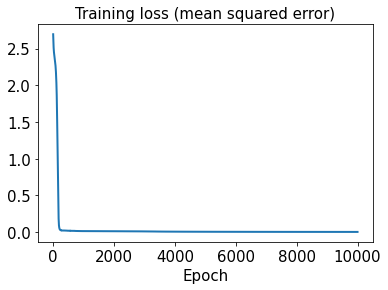

In [54]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

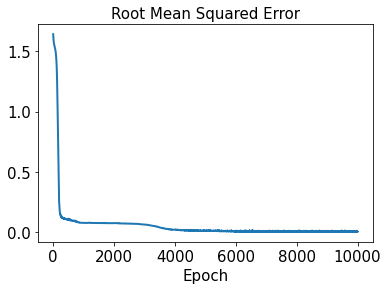

In [55]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [56]:
test_results2 = sd2.evaluate(t_test)

1/1 [==============================] - 0s 64ms/step - loss: 0.0026 - rmse: 0.0000e+00


In [57]:
decoded_train2 = sd2.predict(t_train)

In [58]:
decoded_test2 = sd2.predict(t_test)

In [59]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [60]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [61]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.002728495353273173


In [62]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.0028586488363404067


In [63]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.0020438251353948156, 0.003974809650421819, 0.001530121076562389, 0.002036712556286904, 0.0008476106814243679, 0.0029448987824677968, 0.0012581549331003954, 0.002530010219561508, 0.0010374802231822458, 0.002984725564477694, 0.0028366446569730534, 0.0064530399801339825, 0.0017036795864123525, 0.004346834823030506, 0.0023260965932340263, 0.005996173969580329, 0.0022093211509905176, 0.0007249208442210265, 0.005558029340334567, 0.0023714364536833754, 0.003270761901186798, 0.005137681157595335, 0.0031294109231656355, 0.0010134922293038304, 0.002685099895214465, 0.0026288691139848353, 0.000856717292306216, 0.0007042549029056297, 0.0006403545104332135, 0.003617505553314788, 0.0015009389508998387, 0.0018751750370428893, 0.0034103644905989555]


In [64]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.0011820801840638983, 0.0017612795417966901, 0.0032743253995220684, 0.0013555395656305068, 0.00473422692413096, 0.003685012845488649, 0.0006299591777941448, 0.003548490095214731]


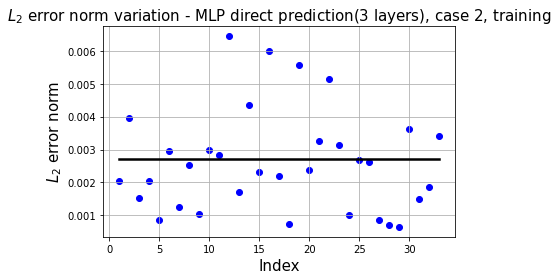

In [105]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

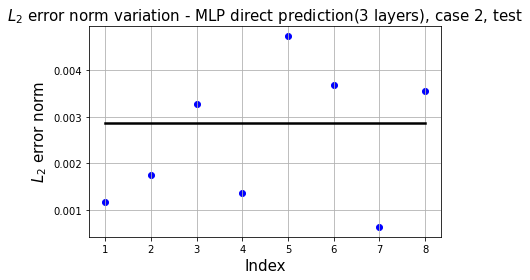

In [106]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

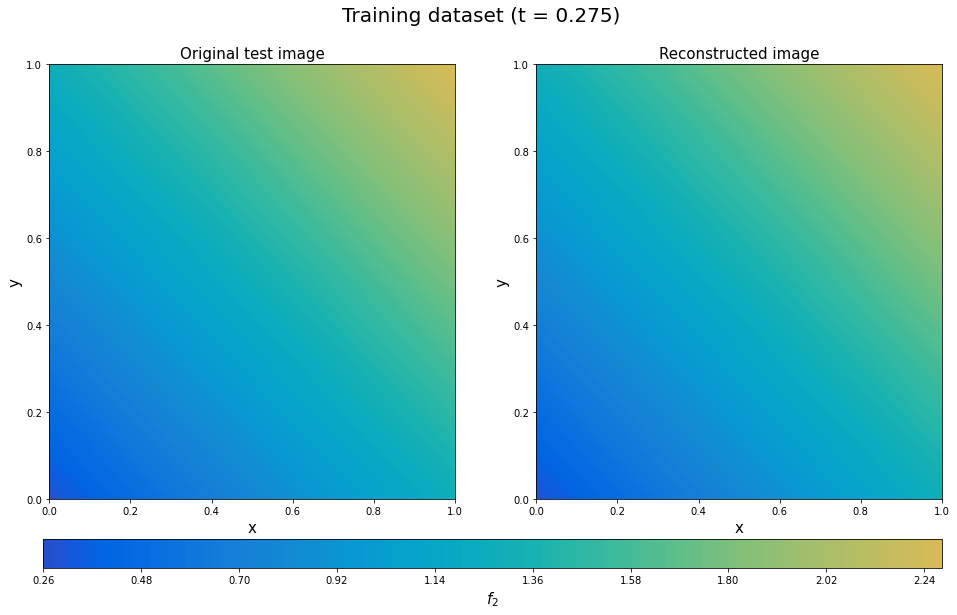

In [67]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

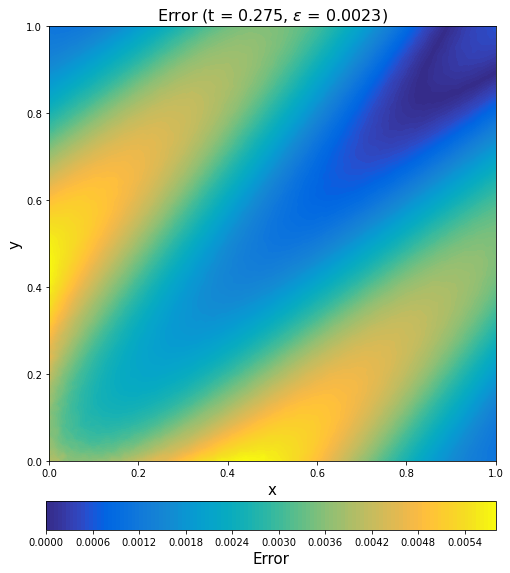

In [68]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

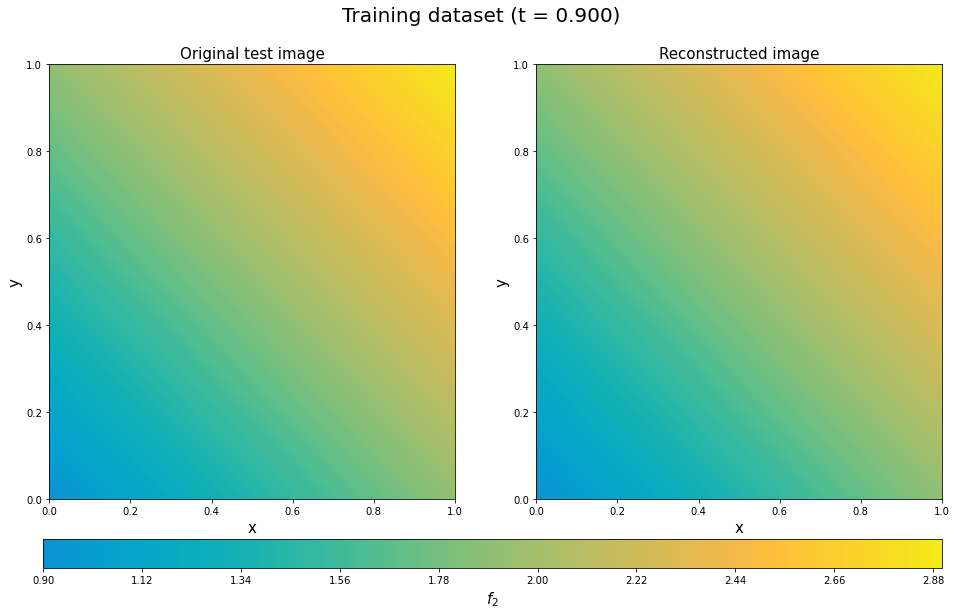

In [69]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

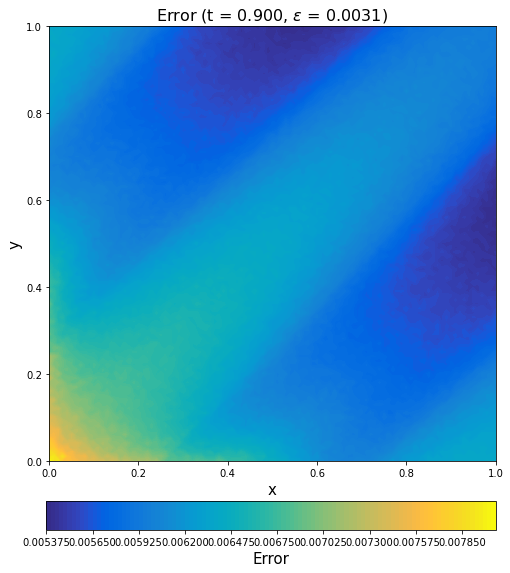

In [70]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

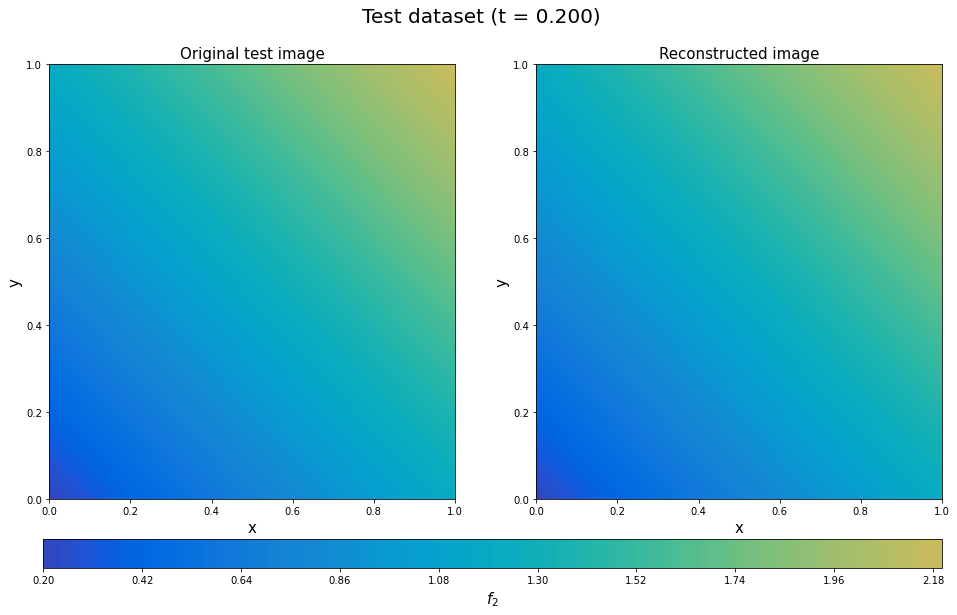

In [71]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

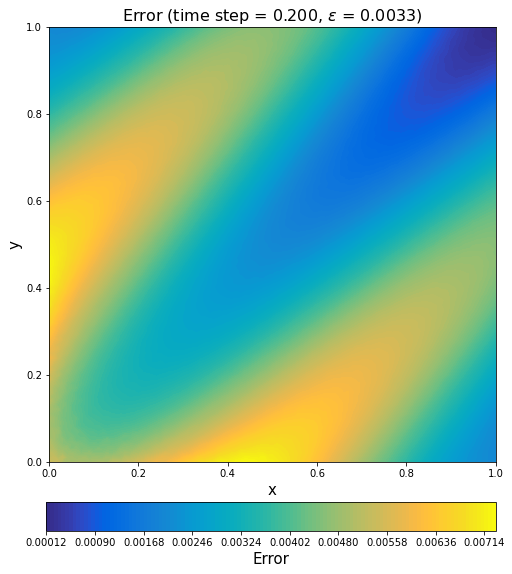

In [72]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

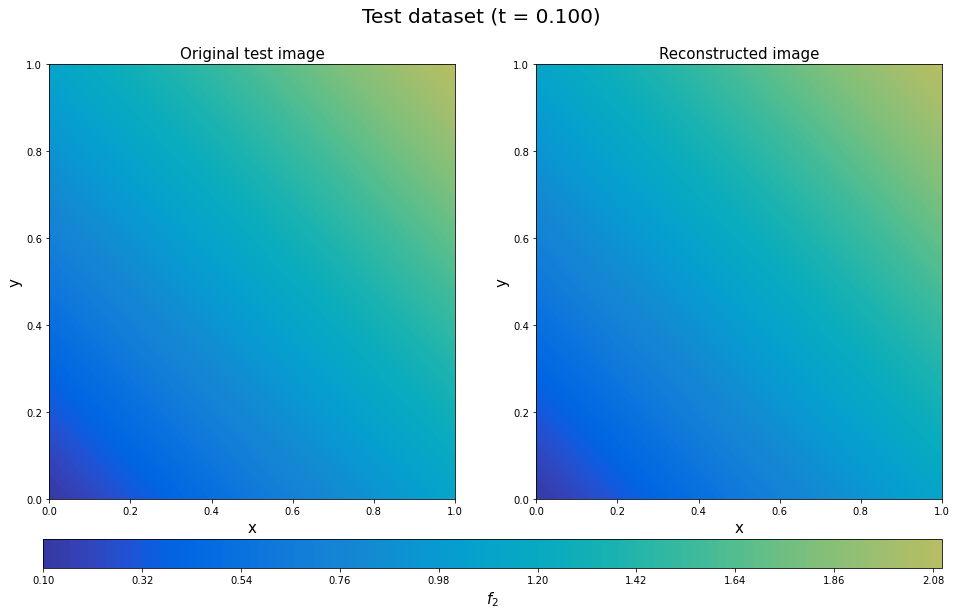

In [73]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

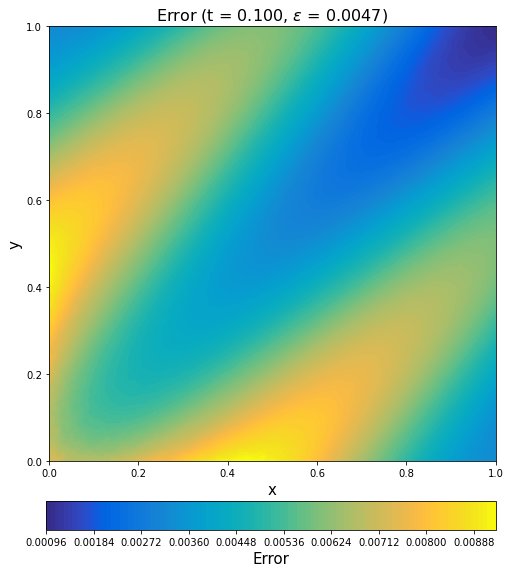

In [109]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [75]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [76]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [77]:
sensor3 = sensor3.reshape((41, 16, 1))

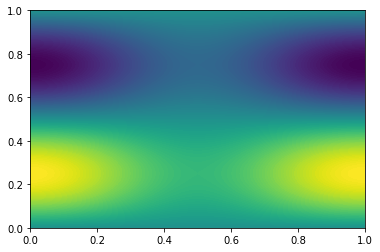

In [78]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [79]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [80]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [81]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [82]:
start3 = datetime.datetime.now()
history3 = sd3.fit(t_train, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 20ms/step - loss: 3.8732 - rmse: 1.9674
Epoch 2/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7206 - rmse: 1.9282
Epoch 3/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5744 - rmse: 1.8899
Epoch 4/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4348 - rmse: 1.8526
Epoch 5/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3000 - rmse: 1.8159
Epoch 6/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1699 - rmse: 1.7797
Epoch 7/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0467 - rmse: 1.7448
Epoch 8/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9295 - rmse: 1.7109
Epoch 9/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8196 - rmse: 1.6785
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7164 - rmse: 1.6474
Epoch 11/10000
2/2 [==========================

2/2 [==============================] - 0s 6ms/step - loss: 1.1323 - rmse: 1.0629
Epoch 87/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1293 - rmse: 1.0615
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1265 - rmse: 1.0602
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1239 - rmse: 1.0590
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1215 - rmse: 1.0578
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1191 - rmse: 1.0567
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1168 - rmse: 1.0556
Epoch 93/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1148 - rmse: 1.0546
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1128 - rmse: 1.0537
Epoch 95/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1109 - rmse: 1.0528
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 1.0433 - rmse: 1.0201
Epoch 171/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0425 - rmse: 1.0198
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0418 - rmse: 1.0194
Epoch 173/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0410 - rmse: 1.0190
Epoch 174/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0403 - rmse: 1.0187
Epoch 175/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0395 - rmse: 1.0183
Epoch 176/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0387 - rmse: 1.0179
Epoch 177/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0380 - rmse: 1.0175
Epoch 178/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0372 - rmse: 1.0171
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0364 - rmse: 1.0167
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.9624 - rmse: 0.9796
Epoch 255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9612 - rmse: 0.9790
Epoch 256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.9600 - rmse: 0.9784
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9587 - rmse: 0.9777
Epoch 258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9575 - rmse: 0.9771
Epoch 259/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.9563 - rmse: 0.9765
Epoch 260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9551 - rmse: 0.9758
Epoch 261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9538 - rmse: 0.9752
Epoch 262/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.9526 - rmse: 0.9746
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9513 - rmse: 0.9739
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.8320 - rmse: 0.9104
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8300 - rmse: 0.9093
Epoch 340/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8280 - rmse: 0.9082
Epoch 341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8259 - rmse: 0.9071
Epoch 342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8238 - rmse: 0.9059
Epoch 343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.8217 - rmse: 0.9047
Epoch 344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.8195 - rmse: 0.9035
Epoch 345/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8174 - rmse: 0.9023
Epoch 346/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.8153 - rmse: 0.9012
Epoch 347/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.8133 - rmse: 0.9000
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.6415 - rmse: 0.7985
Epoch 423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6388 - rmse: 0.7968
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6360 - rmse: 0.7951
Epoch 425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6335 - rmse: 0.7935
Epoch 426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6310 - rmse: 0.7919
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6285 - rmse: 0.7903
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6261 - rmse: 0.7888
Epoch 429/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6236 - rmse: 0.7872
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6211 - rmse: 0.7856
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6186 - rmse: 0.7840
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.4305 - rmse: 0.6524
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4282 - rmse: 0.6505
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4257 - rmse: 0.6486
Epoch 509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4233 - rmse: 0.6468
Epoch 510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4209 - rmse: 0.6449
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4187 - rmse: 0.6432
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4166 - rmse: 0.6415
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4145 - rmse: 0.6399
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4123 - rmse: 0.6381
Epoch 515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4101 - rmse: 0.6364
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2895 - rmse: 0.5325
Epoch 591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2882 - rmse: 0.5313
Epoch 592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2871 - rmse: 0.5303
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2860 - rmse: 0.5292
Epoch 594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2849 - rmse: 0.5281
Epoch 595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2837 - rmse: 0.5270
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2826 - rmse: 0.5259
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2813 - rmse: 0.5248
Epoch 598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2800 - rmse: 0.5235
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2788 - rmse: 0.5223
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2175 - rmse: 0.4595
Epoch 675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2171 - rmse: 0.4591
Epoch 676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2166 - rmse: 0.4586
Epoch 677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2162 - rmse: 0.4581
Epoch 678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2157 - rmse: 0.4576
Epoch 679/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2151 - rmse: 0.4570
Epoch 680/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2146 - rmse: 0.4564
Epoch 681/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2139 - rmse: 0.4557
Epoch 682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2132 - rmse: 0.4549
Epoch 683/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2125 - rmse: 0.4541
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1770 - rmse: 0.4129
Epoch 759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1766 - rmse: 0.4125
Epoch 760/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1762 - rmse: 0.4119
Epoch 761/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1758 - rmse: 0.4114
Epoch 762/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1755 - rmse: 0.4110
Epoch 763/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.1751 - rmse: 0.4106
Epoch 764/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1748 - rmse: 0.4102
Epoch 765/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1745 - rmse: 0.4098
Epoch 766/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1742 - rmse: 0.4095
Epoch 767/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1739 - rmse: 0.4091
Epoch 768/10000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 0.1522 - rmse: 0.3816
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1520 - rmse: 0.3813
Epoch 844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1517 - rmse: 0.3809
Epoch 845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1514 - rmse: 0.3805
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1511 - rmse: 0.3801
Epoch 847/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1508 - rmse: 0.3798
Epoch 848/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1506 - rmse: 0.3795
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1504 - rmse: 0.3791
Epoch 850/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1501 - rmse: 0.3788
Epoch 851/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1499 - rmse: 0.3785
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.1361 - rmse: 0.3595
Epoch 927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1358 - rmse: 0.3590
Epoch 928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1353 - rmse: 0.3584
Epoch 929/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1349 - rmse: 0.3578
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1346 - rmse: 0.3574
Epoch 931/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1343 - rmse: 0.3570
Epoch 932/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1341 - rmse: 0.3567
Epoch 933/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1339 - rmse: 0.3564
Epoch 934/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1337 - rmse: 0.3562
Epoch 935/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1336 - rmse: 0.3561
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1234 - rmse: 0.3419
Epoch 1011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1234 - rmse: 0.3418
Epoch 1012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1233 - rmse: 0.3417
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1234 - rmse: 0.3418
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1233 - rmse: 0.3417
Epoch 1015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1233 - rmse: 0.3416
Epoch 1016/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1232 - rmse: 0.3416
Epoch 1017/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1233 - rmse: 0.3416
Epoch 1018/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1233 - rmse: 0.3417
Epoch 1019/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1234 - rmse: 0.3419
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1121 - rmse: 0.3246
Epoch 1094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1120 - rmse: 0.3245
Epoch 1095/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1119 - rmse: 0.3243
Epoch 1096/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1118 - rmse: 0.3242
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1117 - rmse: 0.3239
Epoch 1098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1115 - rmse: 0.3237
Epoch 1099/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1114 - rmse: 0.3235
Epoch 1100/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1113 - rmse: 0.3233
Epoch 1101/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1112 - rmse: 0.3231
Epoch 1102/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1110 - rmse: 0.3229
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.1024 - rmse: 0.3093
Epoch 1177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1024 - rmse: 0.3093
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1023 - rmse: 0.3091
Epoch 1179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1022 - rmse: 0.3089
Epoch 1180/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1021 - rmse: 0.3087
Epoch 1181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1019 - rmse: 0.3085
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1018 - rmse: 0.3083
Epoch 1183/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1017 - rmse: 0.3081
Epoch 1184/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1016 - rmse: 0.3079
Epoch 1185/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1015 - rmse: 0.3077
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0935 - rmse: 0.2942
Epoch 1260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0934 - rmse: 0.2940
Epoch 1261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0933 - rmse: 0.2938
Epoch 1262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0932 - rmse: 0.2937
Epoch 1263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0932 - rmse: 0.2937
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0932 - rmse: 0.2936
Epoch 1265/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0930 - rmse: 0.2933
Epoch 1266/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0929 - rmse: 0.2931
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0927 - rmse: 0.2928
Epoch 1268/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0926 - rmse: 0.2926
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0857 - rmse: 0.2805
Epoch 1343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0856 - rmse: 0.2804
Epoch 1344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0854 - rmse: 0.2801
Epoch 1345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0852 - rmse: 0.2797
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0851 - rmse: 0.2794
Epoch 1347/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0850 - rmse: 0.2792
Epoch 1348/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0849 - rmse: 0.2791
Epoch 1349/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0848 - rmse: 0.2789
Epoch 1350/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0847 - rmse: 0.2787
Epoch 1351/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0846 - rmse: 0.2785
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0781 - rmse: 0.2659
Epoch 1426/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0780 - rmse: 0.2657
Epoch 1427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0778 - rmse: 0.2653
Epoch 1428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0776 - rmse: 0.2648
Epoch 1429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0773 - rmse: 0.2643
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0770 - rmse: 0.2638
Epoch 1431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0768 - rmse: 0.2634
Epoch 1432/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0766 - rmse: 0.2632
Epoch 1433/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0764 - rmse: 0.2627
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0762 - rmse: 0.2624
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0688 - rmse: 0.2474
Epoch 1509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0687 - rmse: 0.2472
Epoch 1510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0686 - rmse: 0.2470
Epoch 1511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0685 - rmse: 0.2469
Epoch 1512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0685 - rmse: 0.2469
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0686 - rmse: 0.2470
Epoch 1514/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0686 - rmse: 0.2472
Epoch 1515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0686 - rmse: 0.2472
Epoch 1516/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0686 - rmse: 0.2472
Epoch 1517/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0685 - rmse: 0.2471
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0611 - rmse: 0.2308
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0610 - rmse: 0.2306
Epoch 1593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0609 - rmse: 0.2303
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0609 - rmse: 0.2302
Epoch 1595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0608 - rmse: 0.2301
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0608 - rmse: 0.2301
Epoch 1597/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0608 - rmse: 0.2299
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0606 - rmse: 0.2296
Epoch 1599/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0604 - rmse: 0.2293
Epoch 1600/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0603 - rmse: 0.2289
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0540 - rmse: 0.2140
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0539 - rmse: 0.2137
Epoch 1676/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0538 - rmse: 0.2135
Epoch 1677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0537 - rmse: 0.2132
Epoch 1678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0536 - rmse: 0.2130
Epoch 1679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0535 - rmse: 0.2129
Epoch 1680/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0535 - rmse: 0.2127
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0534 - rmse: 0.2125
Epoch 1682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0533 - rmse: 0.2123
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0532 - rmse: 0.2121
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0471 - rmse: 0.1960
Epoch 1758/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0470 - rmse: 0.1957
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0468 - rmse: 0.1954
Epoch 1760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0467 - rmse: 0.1951
Epoch 1761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0466 - rmse: 0.1948
Epoch 1762/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0465 - rmse: 0.1946
Epoch 1763/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0464 - rmse: 0.1943
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0463 - rmse: 0.1940
Epoch 1765/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0462 - rmse: 0.1937
Epoch 1766/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0461 - rmse: 0.1934
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0408 - rmse: 0.1781
Epoch 1841/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0407 - rmse: 0.1781
Epoch 1842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0407 - rmse: 0.1779
Epoch 1843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0406 - rmse: 0.1776
Epoch 1844/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0405 - rmse: 0.1773
Epoch 1845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0404 - rmse: 0.1769
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0403 - rmse: 0.1766
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0401 - rmse: 0.1763
Epoch 1848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0401 - rmse: 0.1760
Epoch 1849/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0399 - rmse: 0.1756
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0343 - rmse: 0.1573
Epoch 1924/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0343 - rmse: 0.1571
Epoch 1925/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0342 - rmse: 0.1568
Epoch 1926/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0341 - rmse: 0.1566
Epoch 1927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0340 - rmse: 0.1564
Epoch 1928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0340 - rmse: 0.1562
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0339 - rmse: 0.1560
Epoch 1930/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0339 - rmse: 0.1558
Epoch 1931/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0338 - rmse: 0.1557
Epoch 1932/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0338 - rmse: 0.1555
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0287 - rmse: 0.1362
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0286 - rmse: 0.1360
Epoch 2008/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0286 - rmse: 0.1359
Epoch 2009/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0285 - rmse: 0.1358
Epoch 2010/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0285 - rmse: 0.1356
Epoch 2011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0284 - rmse: 0.1352
Epoch 2012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0283 - rmse: 0.1347
Epoch 2013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0282 - rmse: 0.1343
Epoch 2014/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0281 - rmse: 0.1340
Epoch 2015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0280 - rmse: 0.1337
Epoch 2016/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0240 - rmse: 0.1155
Epoch 2090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0240 - rmse: 0.1154
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0239 - rmse: 0.1151
Epoch 2092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0239 - rmse: 0.1148
Epoch 2093/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0238 - rmse: 0.1143
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0237 - rmse: 0.1139
Epoch 2095/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0236 - rmse: 0.1134
Epoch 2096/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0235 - rmse: 0.1131
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0234 - rmse: 0.1128
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0234 - rmse: 0.1126
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0206 - rmse: 0.0975
Epoch 2173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0206 - rmse: 0.0971
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.0968
Epoch 2175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0204 - rmse: 0.0964
Epoch 2176/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0204 - rmse: 0.0961
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.0958
Epoch 2178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0203 - rmse: 0.0955
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.0952
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.0951
Epoch 2181/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0202 - rmse: 0.0950
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.0805
Epoch 2256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.0802
Epoch 2257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.0799
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.0796
Epoch 2259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.0793
Epoch 2260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0178 - rmse: 0.0792
Epoch 2261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0178 - rmse: 0.0790
Epoch 2262/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0178 - rmse: 0.0790
Epoch 2263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.0789
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.0787
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0163 - rmse: 0.0669
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.0671
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.0671
Epoch 2341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0163 - rmse: 0.0669
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.0668
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.0668
Epoch 2344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0163 - rmse: 0.0668
Epoch 2345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.0668
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.0669
Epoch 2347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0163 - rmse: 0.0669
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0155 - rmse: 0.0602
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0600
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0599
Epoch 2424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0155 - rmse: 0.0599
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0598
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0597
Epoch 2427/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0155 - rmse: 0.0596
Epoch 2428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.0595
Epoch 2429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0154 - rmse: 0.0594
Epoch 2430/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0154 - rmse: 0.0594
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.0553
Epoch 2505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0150 - rmse: 0.0552
Epoch 2506/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0150 - rmse: 0.0551
Epoch 2507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0150 - rmse: 0.0551
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.0551
Epoch 2509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0150 - rmse: 0.0551
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.0550
Epoch 2511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0149 - rmse: 0.0548
Epoch 2512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0149 - rmse: 0.0548
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.0547
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.0527
Epoch 2588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.0527
Epoch 2589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.0526
Epoch 2590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.0525
Epoch 2591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0146 - rmse: 0.0525
Epoch 2592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.0524
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.0524
Epoch 2594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.0524
Epoch 2595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.0525
Epoch 2596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.0524
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0143 - rmse: 0.0504
Epoch 2671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0143 - rmse: 0.0505
Epoch 2672/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0143 - rmse: 0.0504
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0143 - rmse: 0.0504
Epoch 2674/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0143 - rmse: 0.0502
Epoch 2675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0143 - rmse: 0.0501
Epoch 2676/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0143 - rmse: 0.0500
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.0498
Epoch 2678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0142 - rmse: 0.0498
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.0498
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.0483
Epoch 2754/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0140 - rmse: 0.0483
Epoch 2755/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.0482
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.0482
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.0482
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.0482
Epoch 2759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.0482
Epoch 2760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0140 - rmse: 0.0482
Epoch 2761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.0483
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.0483
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0138 - rmse: 0.0479
Epoch 2837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0138 - rmse: 0.0479
Epoch 2838/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0138 - rmse: 0.0480
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.0482
Epoch 2840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0138 - rmse: 0.0483
Epoch 2841/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0138 - rmse: 0.0482
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.0480
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.0479
Epoch 2844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0137 - rmse: 0.0478
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.0477
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0135 - rmse: 0.0479
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.0478
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.0478
Epoch 2922/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0135 - rmse: 0.0477
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.0476
Epoch 2924/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0135 - rmse: 0.0475
Epoch 2925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0135 - rmse: 0.0474
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.0474
Epoch 2927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0135 - rmse: 0.0472
Epoch 2928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0135 - rmse: 0.0471
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0133 - rmse: 0.0467
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.0466
Epoch 3004/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0133 - rmse: 0.0465
Epoch 3005/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0133 - rmse: 0.0465
Epoch 3006/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0133 - rmse: 0.0463
Epoch 3007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0133 - rmse: 0.0462
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.0461
Epoch 3009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0132 - rmse: 0.0461
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.0462
Epoch 3011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.0463
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0449
Epoch 3086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0130 - rmse: 0.0448
Epoch 3087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0448
Epoch 3088/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.0448
Epoch 3089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.0448
Epoch 3090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0130 - rmse: 0.0449
Epoch 3091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.0449
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0449
Epoch 3093/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0130 - rmse: 0.0450
Epoch 3094/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0130 - rmse: 0.0451
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.0444
Epoch 3169/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0128 - rmse: 0.0441
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0440
Epoch 3171/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.0440
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0441
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0442
Epoch 3174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0128 - rmse: 0.0442
Epoch 3175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0128 - rmse: 0.0443
Epoch 3176/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.0443
Epoch 3177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.0444
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0449
Epoch 3252/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0126 - rmse: 0.0449
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0449
Epoch 3254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0126 - rmse: 0.0449
Epoch 3255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0126 - rmse: 0.0449
Epoch 3256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0450
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0450
Epoch 3258/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0126 - rmse: 0.0451
Epoch 3259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0451
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0450
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.0432
Epoch 3335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0124 - rmse: 0.0431
Epoch 3336/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0124 - rmse: 0.0431
Epoch 3337/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0124 - rmse: 0.0431
Epoch 3338/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0124 - rmse: 0.0431
Epoch 3339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0124 - rmse: 0.0431
Epoch 3340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0124 - rmse: 0.0430
Epoch 3341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0123 - rmse: 0.0430
Epoch 3342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0123 - rmse: 0.0430
Epoch 3343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0123 - rmse: 0.0430
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.0427
Epoch 3418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.0427
Epoch 3419/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0121 - rmse: 0.0427
Epoch 3420/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.0428
Epoch 3421/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0121 - rmse: 0.0429
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0429
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0430
Epoch 3424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0121 - rmse: 0.0432
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0434
Epoch 3426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.0436
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0120 - rmse: 0.0416
Epoch 3501/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0120 - rmse: 0.0417
Epoch 3502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0120 - rmse: 0.0419
Epoch 3503/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0120 - rmse: 0.0422
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.0425
Epoch 3505/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0120 - rmse: 0.0429
Epoch 3506/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0120 - rmse: 0.0427
Epoch 3507/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0120 - rmse: 0.0424
Epoch 3508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0120 - rmse: 0.0423
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.0421
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0414
Epoch 3584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.0414
Epoch 3585/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0117 - rmse: 0.0414
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0414
Epoch 3587/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.0414
Epoch 3588/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0117 - rmse: 0.0414
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0415
Epoch 3590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.0416
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.0417
Epoch 3592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0417
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0116 - rmse: 0.0418
Epoch 3667/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.0422
Epoch 3668/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0116 - rmse: 0.0423
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0421
Epoch 3670/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.0419
Epoch 3671/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0116 - rmse: 0.0419
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0421
Epoch 3673/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.0424
Epoch 3674/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.0426
Epoch 3675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.0428
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0114 - rmse: 0.0423
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.0421
Epoch 3751/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0114 - rmse: 0.0420
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.0421
Epoch 3753/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0114 - rmse: 0.0424
Epoch 3754/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0114 - rmse: 0.0426
Epoch 3755/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0114 - rmse: 0.0427
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.0430
Epoch 3757/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0114 - rmse: 0.0426
Epoch 3758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0114 - rmse: 0.0421
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.0419
Epoch 3833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.0418
Epoch 3834/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0113 - rmse: 0.0417
Epoch 3835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0413
Epoch 3836/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0410
Epoch 3837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0409
Epoch 3838/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.0410
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0412
Epoch 3840/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.0415
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0417
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0427
Epoch 3916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0422
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0418
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0415
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0414
Epoch 3920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0412
Epoch 3921/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0110 - rmse: 0.0409
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0408
Epoch 3923/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0110 - rmse: 0.0408
Epoch 3924/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.0410
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0414
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0415
Epoch 4000/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.0416
Epoch 4001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0417
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0417
Epoch 4003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0417
Epoch 4004/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0416
Epoch 4005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0415
Epoch 4006/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0415
Epoch 4007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0415
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0416
Epoch 4082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0423
Epoch 4083/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.0421
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0416
Epoch 4085/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0411
Epoch 4086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0405
Epoch 4087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0402
Epoch 4088/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0402
Epoch 4089/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.0402
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0405
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0400
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0395
Epoch 4166/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0391
Epoch 4167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0394
Epoch 4168/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0400
Epoch 4169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0408
Epoch 4170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0417
Epoch 4171/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.0416
Epoch 4172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0407
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0399
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0396
Epoch 4248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0395
Epoch 4249/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.0394
Epoch 4250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0394
Epoch 4251/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.0397
Epoch 4252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.0402
Epoch 4253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.0405
Epoch 4254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0400
Epoch 4255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0395
Epoch 4256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0396
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0389
Epoch 4331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0389
Epoch 4332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0390
Epoch 4333/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0393
Epoch 4334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.0398
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0401
Epoch 4336/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0398
Epoch 4337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0395
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0394
Epoch 4339/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0393
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0395
Epoch 4414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.0396
Epoch 4415/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0399
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0397
Epoch 4417/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.0391
Epoch 4418/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.0387
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0385
Epoch 4420/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.0381
Epoch 4421/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.0380
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0378
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0387
Epoch 4497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0388
Epoch 4498/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0387
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0385
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0385
Epoch 4501/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0385
Epoch 4502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0386
Epoch 4503/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0100 - rmse: 0.0388
Epoch 4504/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.0390
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0394
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0099 - rmse: 0.0373
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0372
Epoch 4581/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0099 - rmse: 0.0372
Epoch 4582/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0372
Epoch 4583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0372
Epoch 4584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0376
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0379
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0382
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0380
Epoch 4588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0375
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0372
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0376
Epoch 4664/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0098 - rmse: 0.0374
Epoch 4665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0369
Epoch 4666/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0098 - rmse: 0.0370
Epoch 4667/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0098 - rmse: 0.0375
Epoch 4668/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0375
Epoch 4669/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0098 - rmse: 0.0372
Epoch 4670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0370
Epoch 4671/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0368
Epoch 4672/10000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0375
Epoch 4746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0373
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0369
Epoch 4748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0366
Epoch 4749/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0364
Epoch 4750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0366
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0371
Epoch 4752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0380
Epoch 4753/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0388
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0389
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0354
Epoch 4829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0355
Epoch 4830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0356
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0355
Epoch 4832/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0355
Epoch 4833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0353
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0352
Epoch 4835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0352
Epoch 4836/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0096 - rmse: 0.0354
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0359
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0356
Epoch 4912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0360
Epoch 4913/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0365
Epoch 4914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0370
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0371
Epoch 4916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0363
Epoch 4917/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0358
Epoch 4918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0356
Epoch 4919/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0355
Epoch 4920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0354
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0357
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0363
Epoch 4996/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0369
Epoch 4997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0366
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0361
Epoch 4999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0358
Epoch 5000/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0357
Epoch 5001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0362
Epoch 5002/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0364
Epoch 5003/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0364
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0374
Epoch 5078/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0375
Epoch 5079/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0376
Epoch 5080/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0378
Epoch 5081/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0093 - rmse: 0.0378
Epoch 5082/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0376
Epoch 5083/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0376
Epoch 5084/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0376
Epoch 5085/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0377
Epoch 5086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0379
Epoch 5087/10000
2/2 [===========

2/2 [==============================] - 0s 6ms/step - loss: 0.0095 - rmse: 0.0379
Epoch 5161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0389
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0387
Epoch 5163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0371
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0349
Epoch 5165/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0337
Epoch 5166/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0092 - rmse: 0.0341
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0339
Epoch 5168/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0332
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0329
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0340
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0340
Epoch 5245/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0091 - rmse: 0.0339
Epoch 5246/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0334
Epoch 5247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0331
Epoch 5248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0329
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0328
Epoch 5250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0328
Epoch 5251/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0329
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0332
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0340
Epoch 5327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0354
Epoch 5328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0367
Epoch 5329/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0374
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0372
Epoch 5331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0366
Epoch 5332/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0091 - rmse: 0.0359
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0351
Epoch 5334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0346
Epoch 5335/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0341
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0328
Epoch 5410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0331
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0335
Epoch 5412/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0330
Epoch 5413/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0324
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0322
Epoch 5415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0321
Epoch 5416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0318
Epoch 5417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0316
Epoch 5418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0316
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0321
Epoch 5493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0316
Epoch 5494/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0087 - rmse: 0.0312
Epoch 5495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0312
Epoch 5496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0311
Epoch 5497/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0087 - rmse: 0.0311
Epoch 5498/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0311
Epoch 5499/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0310
Epoch 5500/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0310
Epoch 5501/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0314
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0303
Epoch 5576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0308
Epoch 5577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0317
Epoch 5578/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0322
Epoch 5579/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0087 - rmse: 0.0318
Epoch 5580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0313
Epoch 5581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0309
Epoch 5582/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0306
Epoch 5583/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0304
Epoch 5584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0303
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0087 - rmse: 0.0317
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0310
Epoch 5660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0306
Epoch 5661/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0301
Epoch 5662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0299
Epoch 5663/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0299
Epoch 5664/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0300
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0301
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0300
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0297
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0320
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0327
Epoch 5743/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0332
Epoch 5744/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0333
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0330
Epoch 5746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0327
Epoch 5747/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0323
Epoch 5748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0319
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0317
Epoch 5750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0312
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0277
Epoch 5825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0276
Epoch 5826/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0275
Epoch 5827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0277
Epoch 5828/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0286
Epoch 5829/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0085 - rmse: 0.0291
Epoch 5830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0294
Epoch 5831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0302
Epoch 5832/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0299
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0291
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0283
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0281
Epoch 5909/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0279
Epoch 5910/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0083 - rmse: 0.0276
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0272
Epoch 5912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0269
Epoch 5913/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0083 - rmse: 0.0268
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0268
Epoch 5915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0269
Epoch 5916/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0083 - rmse: 0.0270
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0297
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0289
Epoch 5992/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0283
Epoch 5993/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0083 - rmse: 0.0280
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0278
Epoch 5995/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0276
Epoch 5996/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0275
Epoch 5997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0276
Epoch 5998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0279
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0281
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0272
Epoch 6074/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0273
Epoch 6075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0275
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0271
Epoch 6077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0266
Epoch 6078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0266
Epoch 6079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0267
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0266
Epoch 6081/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0268
Epoch 6082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0269
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0283
Epoch 6157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0285
Epoch 6158/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0283
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0280
Epoch 6160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0279
Epoch 6161/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0081 - rmse: 0.0278
Epoch 6162/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0278
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0282
Epoch 6164/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0082 - rmse: 0.0291
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0289
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0255
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0255
Epoch 6241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0257
Epoch 6242/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0258
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0259
Epoch 6244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0260
Epoch 6245/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0260
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0264
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0265
Epoch 6248/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0260
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0244
Epoch 6323/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0079 - rmse: 0.0243
Epoch 6324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0259
Epoch 6325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0282
Epoch 6326/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0285
Epoch 6327/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0272
Epoch 6328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0256
Epoch 6329/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0247
Epoch 6330/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0248
Epoch 6331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0245
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0248
Epoch 6406/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0246
Epoch 6407/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0246
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0246
Epoch 6409/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0247
Epoch 6410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0247
Epoch 6411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0247
Epoch 6412/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0247
Epoch 6413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0079 - rmse: 0.0248
Epoch 6414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0249
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0247
Epoch 6489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0248
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0250
Epoch 6491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0253
Epoch 6492/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0257
Epoch 6493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0263
Epoch 6494/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0259
Epoch 6495/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0251
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0253
Epoch 6497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0258
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0256
Epoch 6572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0258
Epoch 6573/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0260
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0263
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0256
Epoch 6576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0250
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0256
Epoch 6578/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0262
Epoch 6579/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0258
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0250
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0238
Epoch 6655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0231
Epoch 6656/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0228
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0232
Epoch 6658/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0235
Epoch 6659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0239
Epoch 6660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0249
Epoch 6661/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0253
Epoch 6662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0250
Epoch 6663/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0246
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0238
Epoch 6738/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0252
Epoch 6739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0255
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0249
Epoch 6741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0239
Epoch 6742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0232
Epoch 6743/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0230
Epoch 6744/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0230
Epoch 6745/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0233
Epoch 6746/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0240
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0291
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0288
Epoch 6822/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0270
Epoch 6823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0254
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0250
Epoch 6825/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0252
Epoch 6826/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0255
Epoch 6827/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0255
Epoch 6828/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0244
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0237
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0237
Epoch 6904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0233
Epoch 6905/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0231
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0231
Epoch 6907/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0231
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0233
Epoch 6909/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0230
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0228
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0229
Epoch 6912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0229
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0230
Epoch 6987/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0237
Epoch 6988/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0243
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0242
Epoch 6990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0235
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0230
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0225
Epoch 6993/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0223
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0224
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0224
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0249
Epoch 7070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0244
Epoch 7071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0243
Epoch 7072/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0247
Epoch 7073/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0247
Epoch 7074/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0239
Epoch 7075/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0229
Epoch 7076/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0223
Epoch 7077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0222
Epoch 7078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0222
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0237
Epoch 7153/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0235
Epoch 7154/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0231
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0230
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0229
Epoch 7157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0227
Epoch 7158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0226
Epoch 7159/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0225
Epoch 7160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0224
Epoch 7161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0225
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0234
Epoch 7236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0232
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0230
Epoch 7238/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0228
Epoch 7239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0241
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0254
Epoch 7241/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0251
Epoch 7242/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0239
Epoch 7243/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0229
Epoch 7244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0227
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0216
Epoch 7319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0215
Epoch 7320/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0214
Epoch 7321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0213
Epoch 7322/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0212
Epoch 7323/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0215
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0215
Epoch 7325/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0211
Epoch 7326/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0211
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0214
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0214
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0218
Epoch 7403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0226
Epoch 7404/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0228
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0222
Epoch 7406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0216
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0218
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0223
Epoch 7409/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0231
Epoch 7410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0237
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0215
Epoch 7485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0212
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0211
Epoch 7487/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0212
Epoch 7488/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0215
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0218
Epoch 7490/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0221
Epoch 7491/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0223
Epoch 7492/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0226
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0230
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0212
Epoch 7568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0221
Epoch 7569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0222
Epoch 7570/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0215
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0209
Epoch 7572/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0208
Epoch 7573/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0207
Epoch 7574/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0205
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0205
Epoch 7576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0206
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0214
Epoch 7651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0228
Epoch 7652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0241
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0249
Epoch 7654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0253
Epoch 7655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0245
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0232
Epoch 7657/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0224
Epoch 7658/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0219
Epoch 7659/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0217
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0212
Epoch 7734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0212
Epoch 7735/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0213
Epoch 7736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0218
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0226
Epoch 7738/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0230
Epoch 7739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0229
Epoch 7740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0227
Epoch 7741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0221
Epoch 7742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0218
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0222
Epoch 7817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0226
Epoch 7818/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0224
Epoch 7819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0218
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0216
Epoch 7821/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0221
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0230
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0236
Epoch 7824/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0237
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0235
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0233
Epoch 7900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0228
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0221
Epoch 7902/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0217
Epoch 7903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0214
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0218
Epoch 7905/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0225
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0226
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0223
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0220
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0213
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0217
Epoch 7984/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0236
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0240
Epoch 7986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0230
Epoch 7987/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0217
Epoch 7988/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0207
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0205
Epoch 7990/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0204
Epoch 7991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0204
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0202
Epoch 8066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0204
Epoch 8067/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0207
Epoch 8068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0200
Epoch 8069/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0202
Epoch 8070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0207
Epoch 8071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0202
Epoch 8072/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0196
Epoch 8073/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0203
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0213
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0202
Epoch 8149/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0204
Epoch 8150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0204
Epoch 8151/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0202
Epoch 8152/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0202
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0204
Epoch 8154/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0204
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0202
Epoch 8156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0206
Epoch 8157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0212
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0197
Epoch 8232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0198
Epoch 8233/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0203
Epoch 8234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0208
Epoch 8235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0209
Epoch 8236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0206
Epoch 8237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0202
Epoch 8238/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0218
Epoch 8239/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0233
Epoch 8240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0228
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0218
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0221
Epoch 8316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0216
Epoch 8317/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0209
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0209
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0219
Epoch 8320/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0218
Epoch 8321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0210
Epoch 8322/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0204
Epoch 8323/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0206
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0207
Epoch 8398/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0207
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0204
Epoch 8400/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0205
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0208
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0208
Epoch 8403/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0207
Epoch 8404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0207
Epoch 8405/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0207
Epoch 8406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0203
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 15ms/step - loss: 0.0067 - rmse: 0.0219
Epoch 8481/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0222
Epoch 8482/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0226
Epoch 8483/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0067 - rmse: 0.0227
Epoch 8484/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0223
Epoch 8485/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0067 - rmse: 0.0219
Epoch 8486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0218
Epoch 8487/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0218
Epoch 8488/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0217
Epoch 8489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0217
Epoch 8490/10000
2/2 [============

2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0236
Epoch 8564/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0240
Epoch 8565/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0242
Epoch 8566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0242
Epoch 8567/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0231
Epoch 8568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0223
Epoch 8569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0226
Epoch 8570/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0224
Epoch 8571/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0218
Epoch 8572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0217
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0201
Epoch 8647/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0208
Epoch 8648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0212
Epoch 8649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0213
Epoch 8650/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0199
Epoch 8651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0203
Epoch 8652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0215
Epoch 8653/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0209
Epoch 8654/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0196
Epoch 8655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0195
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0212
Epoch 8730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0213
Epoch 8731/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0225
Epoch 8732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0230
Epoch 8733/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0223
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0209
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0206
Epoch 8736/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0220
Epoch 8737/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0241
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0225
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0199
Epoch 8813/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0199
Epoch 8814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0197
Epoch 8815/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0198
Epoch 8816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0207
Epoch 8817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0217
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0221
Epoch 8819/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0221
Epoch 8820/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0218
Epoch 8821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0216
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0210
Epoch 8896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0203
Epoch 8897/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0201
Epoch 8898/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0202
Epoch 8899/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0206
Epoch 8900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0234
Epoch 8901/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0263
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0286
Epoch 8903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0285
Epoch 8904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0250
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0186
Epoch 8979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0179
Epoch 8980/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0181
Epoch 8981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0184
Epoch 8982/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0189
Epoch 8983/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0193
Epoch 8984/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0188
Epoch 8985/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0182
Epoch 8986/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0182
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0187
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0197
Epoch 9062/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0188
Epoch 9063/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0187
Epoch 9064/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0192
Epoch 9065/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0198
Epoch 9066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0200
Epoch 9067/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0191
Epoch 9068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0184
Epoch 9069/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0185
Epoch 9070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0186
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0197
Epoch 9145/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0202
Epoch 9146/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0205
Epoch 9147/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0208
Epoch 9148/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0064 - rmse: 0.0211
Epoch 9149/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0212
Epoch 9150/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0064 - rmse: 0.0210
Epoch 9151/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0063 - rmse: 0.0208
Epoch 9152/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0063 - rmse: 0.0206
Epoch 9153/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0205
Epoch 9154/10000
2/2 [===========

2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0198
Epoch 9228/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0195
Epoch 9229/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0194
Epoch 9230/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0194
Epoch 9231/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0194
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0196
Epoch 9233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0194
Epoch 9234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0192
Epoch 9235/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0193
Epoch 9236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0193
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0195
Epoch 9311/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0199
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0193
Epoch 9313/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0186
Epoch 9314/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0185
Epoch 9315/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0185
Epoch 9316/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0185
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0185
Epoch 9318/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0062 - rmse: 0.0185
Epoch 9319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0186
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0211
Epoch 9394/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0202
Epoch 9395/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0228
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0255
Epoch 9397/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0241
Epoch 9398/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0216
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0207
Epoch 9400/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0208
Epoch 9401/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0210
Epoch 9402/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0204
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0195
Epoch 9477/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0193
Epoch 9478/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0191
Epoch 9479/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0195
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0206
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0215
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0220
Epoch 9483/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0219
Epoch 9484/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0202
Epoch 9485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0201
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0194
Epoch 9560/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0183
Epoch 9561/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061 - rmse: 0.0182
Epoch 9562/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0180
Epoch 9563/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0179
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0177
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0176
Epoch 9566/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0175
Epoch 9567/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0178
Epoch 9568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0180
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0199
Epoch 9643/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0192
Epoch 9644/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0181
Epoch 9645/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0183
Epoch 9646/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0194
Epoch 9647/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0200
Epoch 9648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0193
Epoch 9649/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0183
Epoch 9650/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0184
Epoch 9651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0190
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0213
Epoch 9726/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0202
Epoch 9727/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0193
Epoch 9728/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0192
Epoch 9729/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0192
Epoch 9730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0193
Epoch 9731/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0196
Epoch 9732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0198
Epoch 9733/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0197
Epoch 9734/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0191
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0196
Epoch 9809/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0197
Epoch 9810/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0190
Epoch 9811/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0187
Epoch 9812/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0185
Epoch 9813/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0181
Epoch 9814/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0182
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0191
Epoch 9816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0198
Epoch 9817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0196
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0226
Epoch 9892/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0213
Epoch 9893/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0205
Epoch 9894/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0201
Epoch 9895/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0198
Epoch 9896/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0195
Epoch 9897/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0194
Epoch 9898/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0197
Epoch 9899/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0199
Epoch 9900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0198
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0227
Epoch 9975/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0228
Epoch 9976/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0207
Epoch 9977/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0187
Epoch 9978/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0180
Epoch 9979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0195
Epoch 9980/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0200
Epoch 9981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0189
Epoch 9982/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0181
Epoch 9983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0179
Epoch 9984/10000
2/2 [===============

In [83]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:01:56.836841


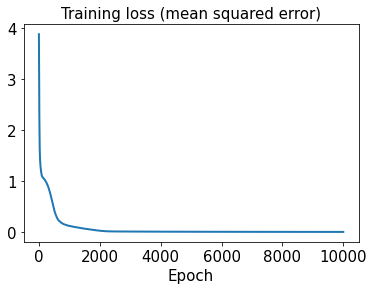

In [84]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

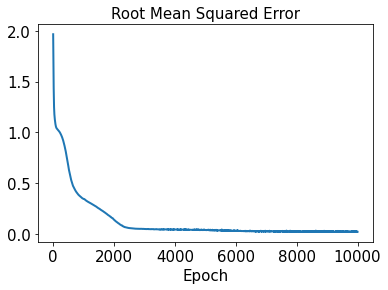

In [85]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [86]:
test_results3 = sd3.evaluate(t_test)

1/1 [==============================] - 0s 62ms/step - loss: 0.0056 - rmse: 0.0000e+00


In [87]:
decoded_train3 = sd3.predict(t_train)

In [88]:
decoded_test3 = sd3.predict(t_test)

In [89]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [90]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [91]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.018901633138347605


In [92]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.01725548824489084


In [93]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.004305662195124593, 0.007633863007271749, 0.0035578025005755737, 0.012015737766353188, 0.013246643191315273, 0.0047988483800905455, 0.014600256409742956, 0.005404100268824257, 0.014250815617917531, 0.014506096437459044, 0.010426157433849642, 0.04086784620819814, 0.0038033933657855147, 0.012244853787566823, 0.010052809524644058, 0.034508626141371464, 0.004331007386400359, 0.00320389890419072, 0.02844379234494648, 0.004519790959112161, 0.025573872363764707, 0.022694305209790665, 0.019557560270928684, 0.005753935931949874, 0.007364419602291535, 0.007610918797267035, 0.004492365354420399, 0.01156351016789483, 0.006194552128274302, 0.0036651308225732634, 0.014323474478663303, 0.004138829560503203, 0.03274916173705781]


In [94]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.005373278943261678, 0.013451236823824085, 0.002285676233870798, 0.003955319516317775, 0.017284097345391918, 0.05038835963017292, 0.009192556362123367, 0.04103642039697119]


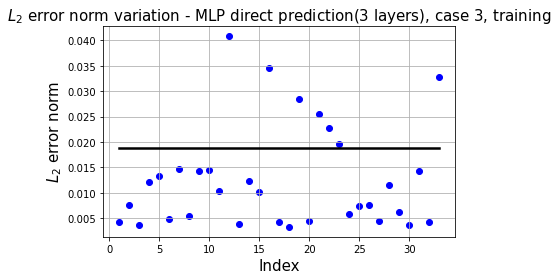

In [107]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

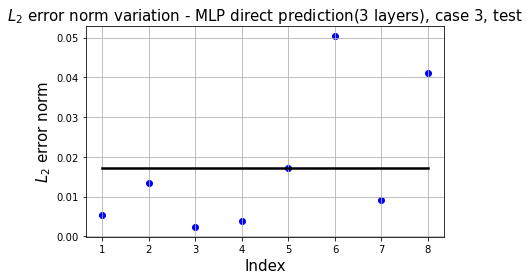

In [108]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

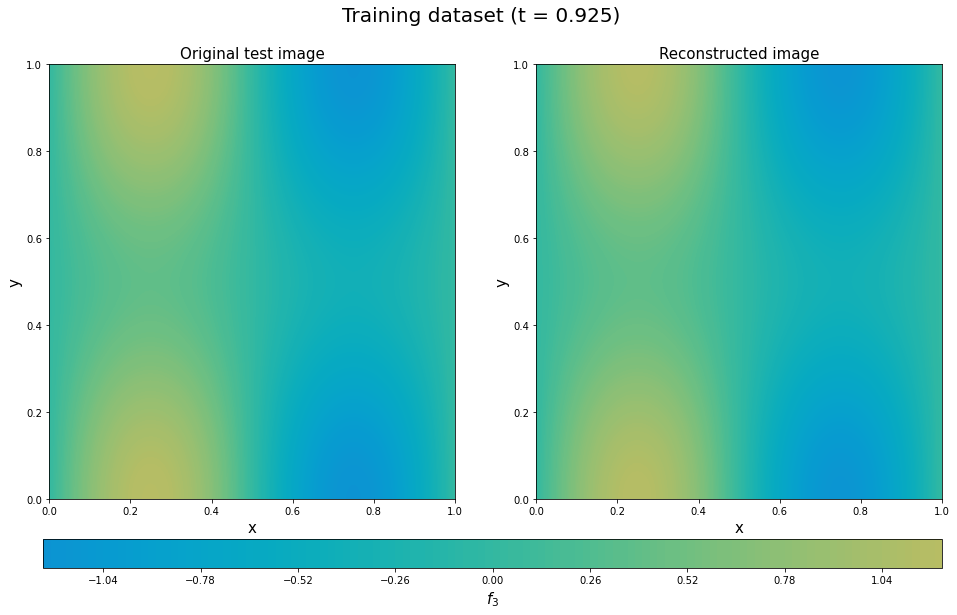

In [97]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

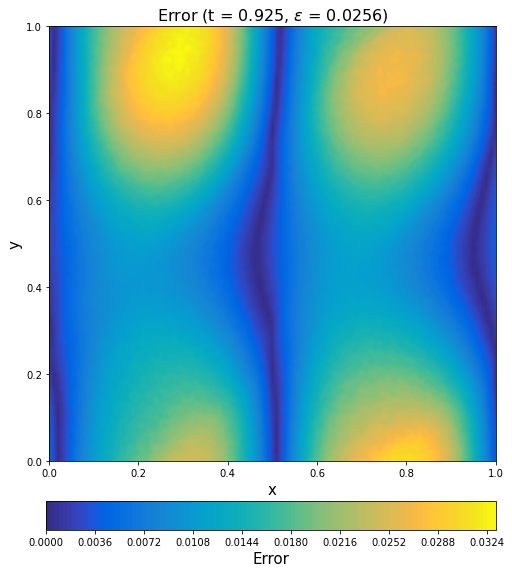

In [98]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

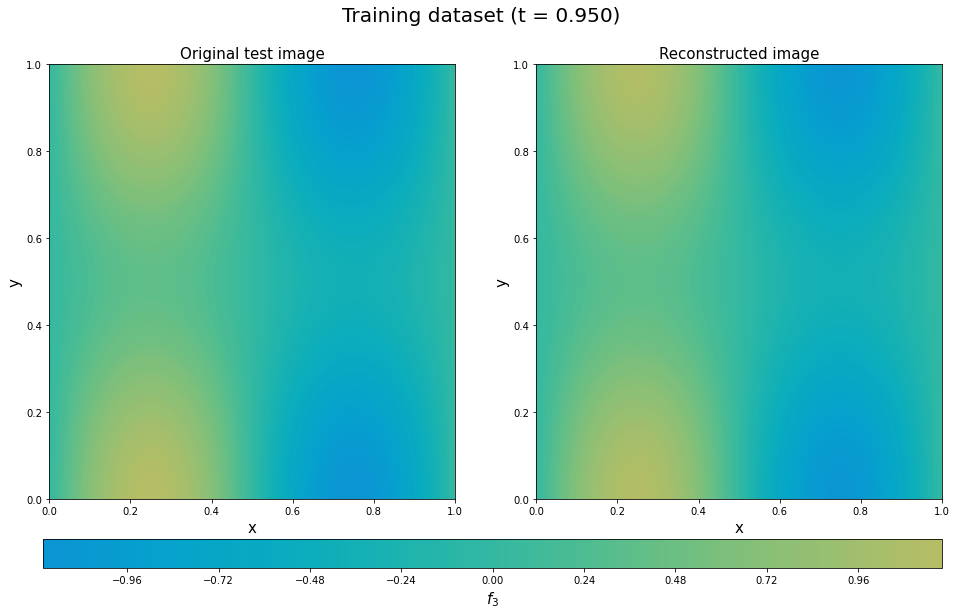

In [99]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

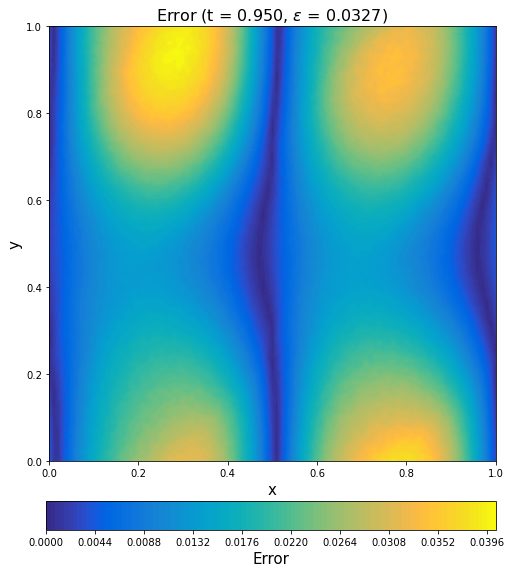

In [100]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

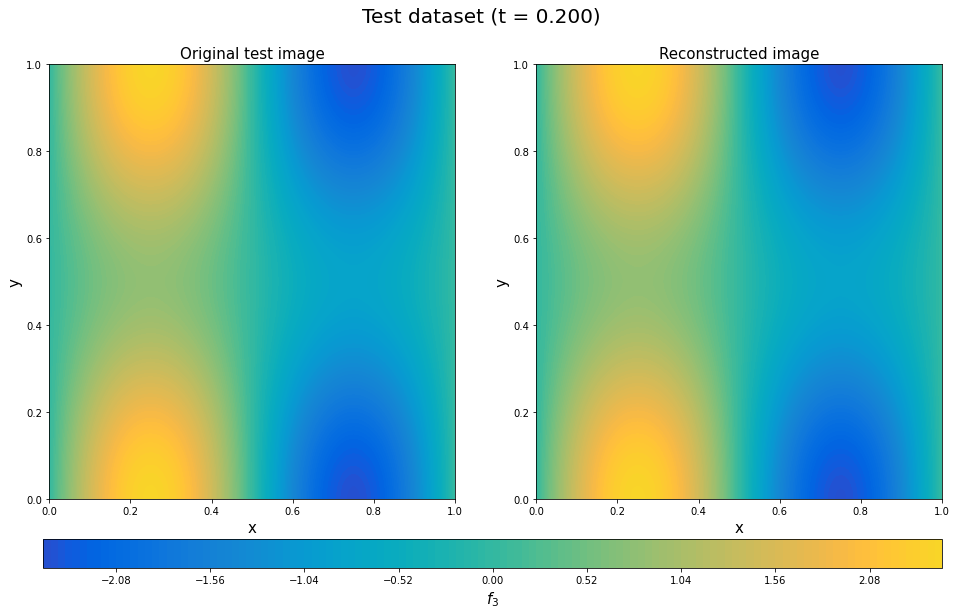

In [101]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

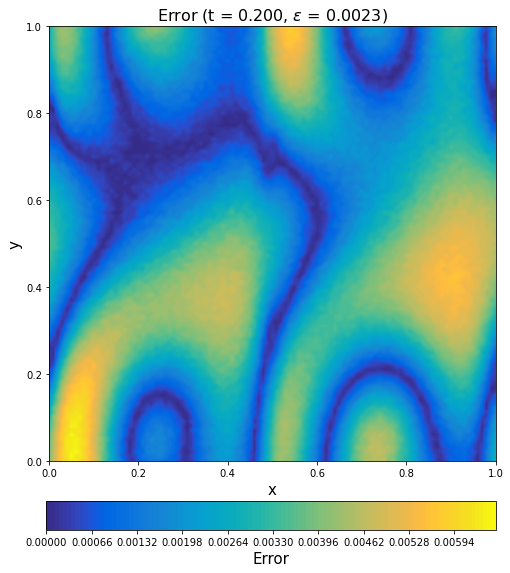

In [102]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

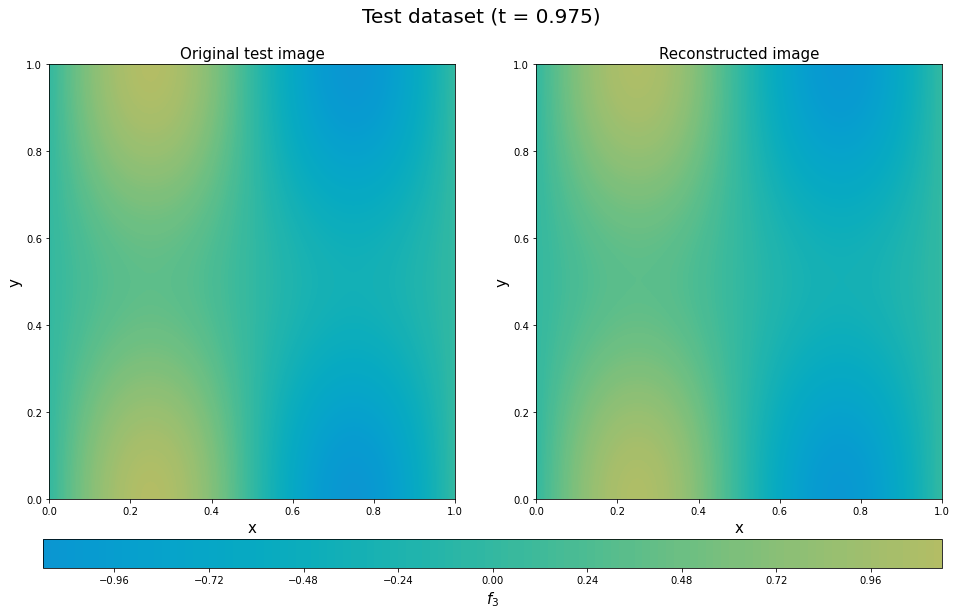

In [103]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

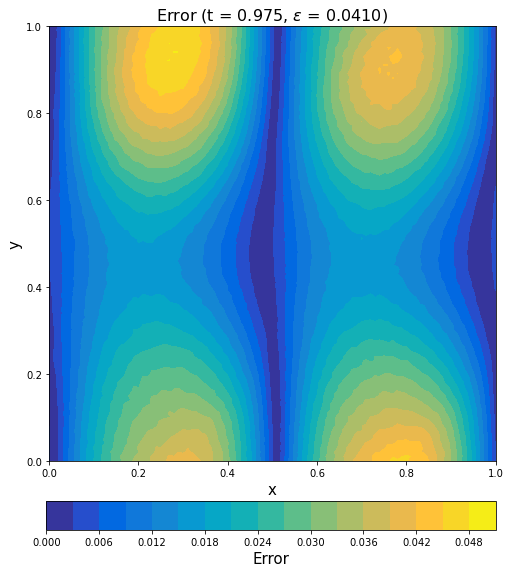

In [104]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()